In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import os
import math
from ruamel.yaml import YAML
from ruamel.yaml.scalarstring import LiteralScalarString

# Usefull functions

In [2]:
def fix_mat(data):
    if data.dtype.names:
        new_data = dict()
        for name in data.dtype.names:
            new_data[name]=data[0][name][0]
        for k,v in new_data.items():
            if v.dtype.names:
                new_data[k] = fix_mat(v)
            else:
                new_data[k] = np.squeeze(v)
        return new_data
    else:
        return data
    
def print_cm(cm, title, tick_labels):
    cm = np.array(cm)
    cm = cm / cm.sum(axis=1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tick_labels)

    disp.plot()
    plt.show()

    

def print_cm_rej(model, X, y_true, th_rej, title, ticket_label):
    cm = [[0, 0], [0, 0]]
    y_probs = model.predict_proba(X)
    count_integrated = 0
    
    for idx_p in range(len(y_probs)):
        if y_true[idx_p] == 730 and y_probs[idx_p,0] > th_rej[0]:
            cm[0][0] += 1 
            count_integrated = count_integrated + 1
        elif y_true[idx_p] == 730 and y_probs[idx_p, 1] > th_rej[0]:
            cm[0][1] += 1
            count_integrated = count_integrated + 1
        elif y_true[idx_p] == 731 and y_probs[idx_p, 1] > th_rej[1]:
            cm[1][1] += 1
            count_integrated = count_integrated + 1
        elif y_true[idx_p] == 731 and y_probs[idx_p, 0] > th_rej[1]:
            cm[1][0] += 1
            count_integrated = count_integrated + 1
    
    # print accuracy
    print('Accuracy:', np.trace(cm)/np.sum(cm))
    print('Accuracy 730:', cm[0][0]/(cm[0][0]+cm[0][1]))
    print('Accuracy 731:', cm[1][1]/(cm[1][0]+cm[1][1]))
    print('Integrated: ', count_integrated, ' percentual: ', count_integrated/len(y_probs), '%')   
    print_cm(cm, title, ticket_label)
    
def accuracy_online(prob, hit, miss, timeout, target, ths):
        
    i1 = np.where(prob[:,0] > ths[0])[0]
    if len(i1) == 0:
        i1 = len(prob[:,0]) + 1
    else:
        i1 = i1[0]
    i2 = np.where(prob[:,1] > ths[1])[0]
    if len(i2) == 0:
        i2 = len(prob[:,1]) + 1
    else:
        i2 = i2[0]
        
        
    
    if (target == 730 and i1 < i2) or (target == 731 and i1 > i2):
        hit += 1
    elif (target == 730 and i1 > i2) or (target == 731 and i1 < i2):
        miss += 1
    elif i1 == i2:
        timeout += 1
        
    return hit, miss, timeout
    
def histo_prediction(X, model, bins_step, classes):
    probs = model.predict_proba(X)
    bins = np.arange(0, 1.0+bins_step, bins_step)
    figure = plt.figure(figsize=(5, 3))
    plt.hist(probs[:,0], bins=bins)
    # Add title and labels
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title('Probability Distribution of class ' + classes[0])
    plt.xlabel('Probability')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()
    

# import data

Train set: (163679, 1) (163679,)
Test set: (40921, 1) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.0}
Best score found:  0.5778885630498534
Accuracy train: 0.5665907049774254
Accuracy test:  0.6257422839129053
Accuracy all:   0.5784213098729227
Accuracy: 0.5665907049774254
Accuracy 730: 0.7009127677513166
Accuracy 731: 0.4322702834799609
Integrated:  163679  percentual:  1.0 %


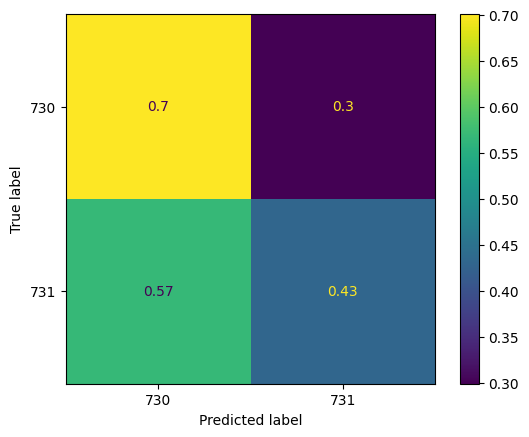

Accuracy: 0.6257422839129053
Accuracy 730: 0.7688285030057181
Accuracy 731: 0.4826490713587488
Integrated:  40921  percentual:  1.0 %


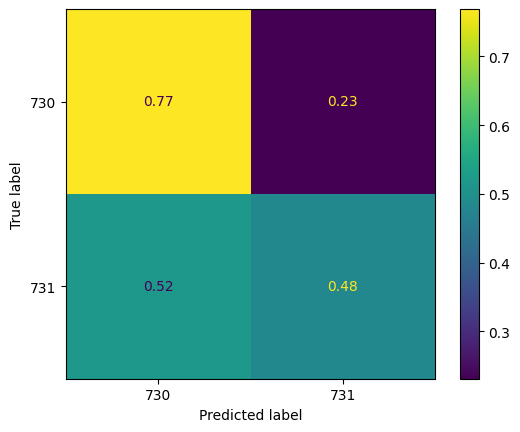

Accuracy: 0.5784213098729227
Accuracy 730: 0.7144965786901271
Accuracy 731: 0.44234604105571845
Integrated:  204600  percentual:  1.0 %


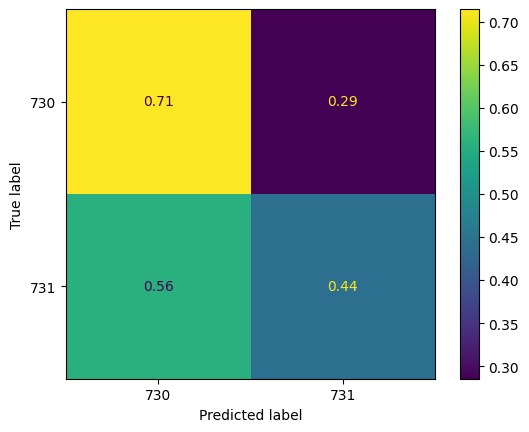

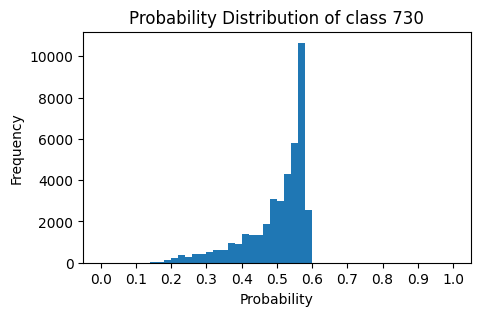

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier1.yaml
Train set: (163679, 2) (163679,)
Test set: (40921, 2) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.5759433040078201
Accuracy train: 0.572009848545018
Accuracy test:  0.6200239485838567
Accuracy all:   0.5816129032258065
Accuracy: 0.572009848545018
Accuracy 730: 0.6849790442209704
Accuracy 731: 0.4590420332355816
Integrated:  163679  percentual:  1.0 %


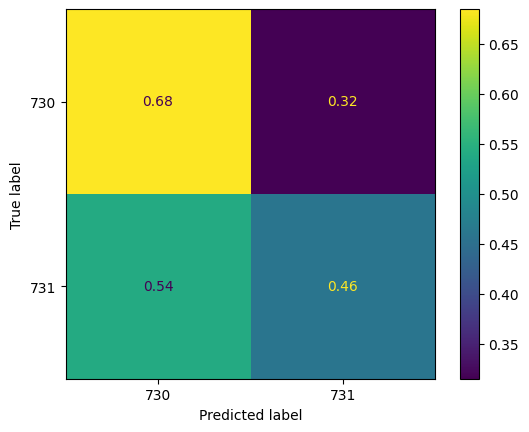

Accuracy: 0.6200239485838567
Accuracy 730: 0.7461512145056449
Accuracy 731: 0.4938905180840665
Integrated:  40921  percentual:  1.0 %


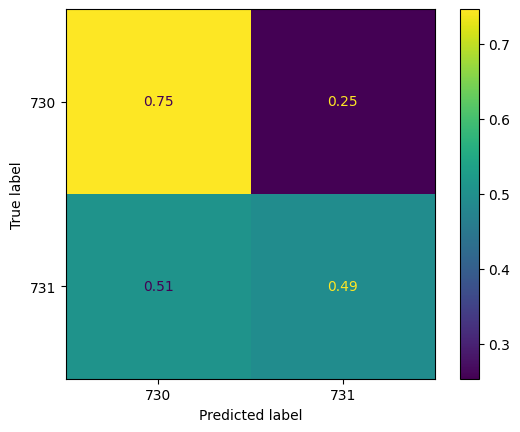

Accuracy: 0.5816129032258065
Accuracy 730: 0.6972140762463344
Accuracy 731: 0.4660117302052786
Integrated:  204600  percentual:  1.0 %


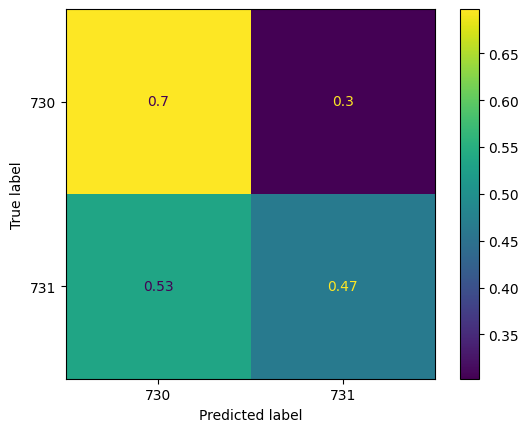

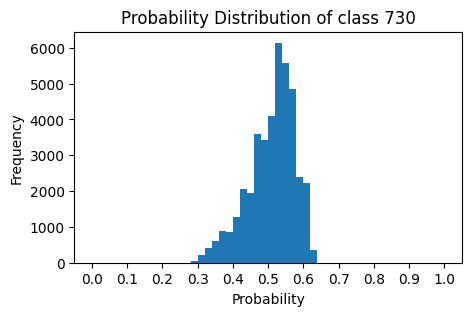

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier2.yaml
Train set: (163679, 3) (163679,)
Test set: (40921, 3) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.5790469208211144
Accuracy train: 0.5832024877962353
Accuracy test:  0.6231763642139733
Accuracy all:   0.591197458455523
Accuracy: 0.5832024877962353
Accuracy 730: 0.6602719974584245
Accuracy 731: 0.5061339198435972
Integrated:  163679  percentual:  1.0 %


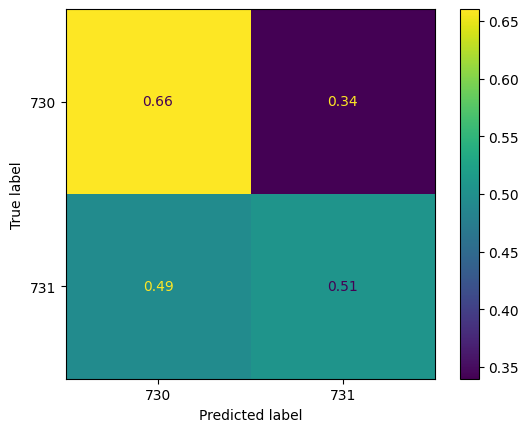

Accuracy: 0.6231763642139733
Accuracy 730: 0.6721079126142417
Accuracy 731: 0.5742424242424242
Integrated:  40921  percentual:  1.0 %


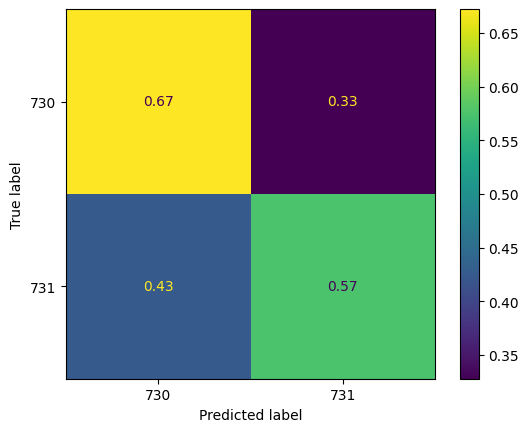

Accuracy: 0.591197458455523
Accuracy 730: 0.6626392961876832
Accuracy 731: 0.5197556207233627
Integrated:  204600  percentual:  1.0 %


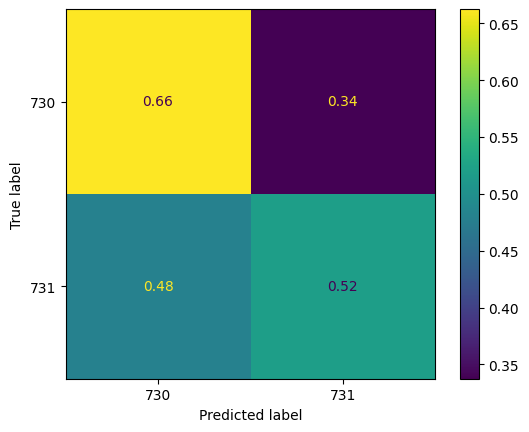

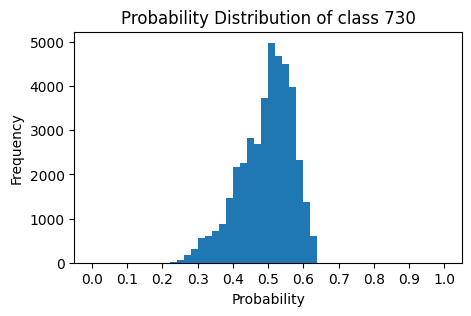

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier3.yaml
Train set: (163679, 4) (163679,)
Test set: (40921, 4) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.1}
Best score found:  0.580791788856305
Accuracy train: 0.5901490111743107
Accuracy test:  0.6088316512304196
Accuracy all:   0.5938856304985337
Accuracy: 0.5901490111743107
Accuracy 730: 0.6366035753125038
Accuracy 731: 0.5436950146627566
Integrated:  163679  percentual:  1.0 %


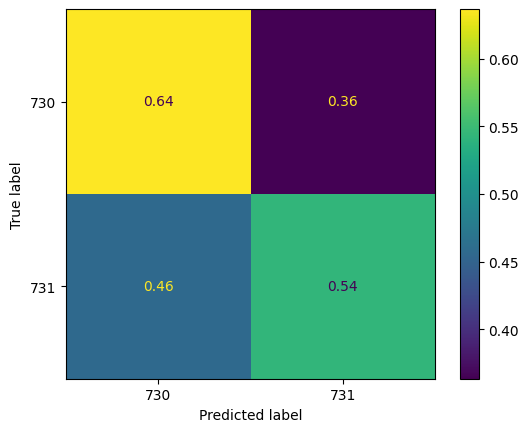

Accuracy: 0.6088316512304196
Accuracy 730: 0.6013391329847027
Accuracy 731: 0.6163245356793744
Integrated:  40921  percentual:  1.0 %


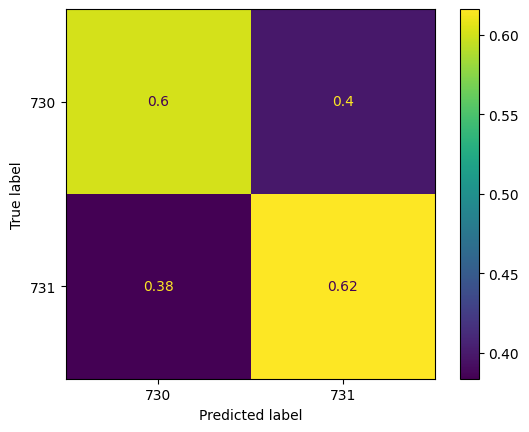

Accuracy: 0.5938856304985337
Accuracy 730: 0.6295503421309873
Accuracy 731: 0.5582209188660802
Integrated:  204600  percentual:  1.0 %


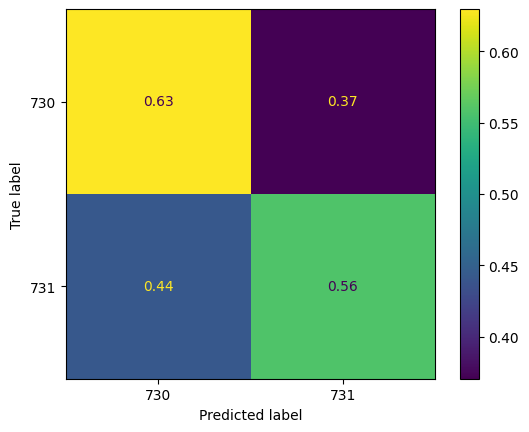

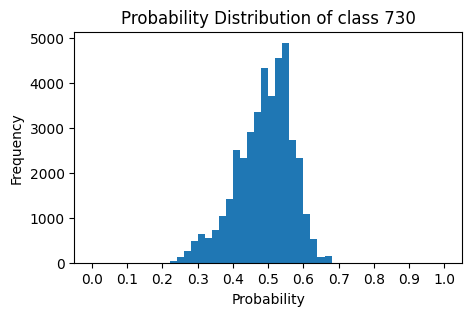

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier4.yaml
Train set: (163679, 5) (163679,)
Test set: (40921, 5) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5836314760508309
Accuracy train: 0.5752967698971768
Accuracy test:  0.6234940495100315
Accuracy all:   0.5849364613880743
Accuracy: 0.5752967698971768
Accuracy 730: 0.5917838683268368
Accuracy 731: 0.5588098729227762
Integrated:  163679  percentual:  1.0 %


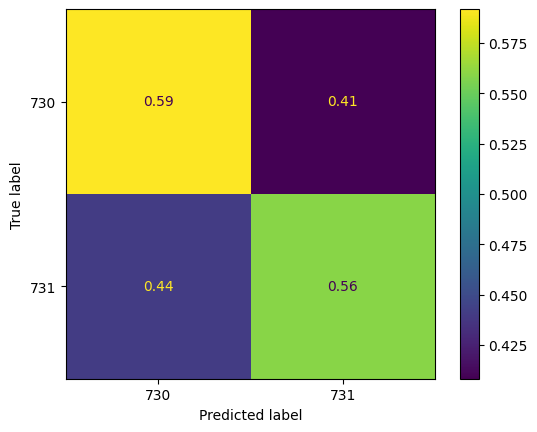

Accuracy: 0.6234940495100315
Accuracy 730: 0.5720150530277113
Accuracy 731: 0.6749755620723362
Integrated:  40921  percentual:  1.0 %


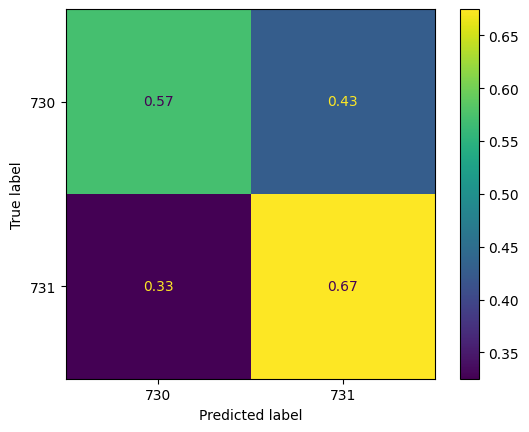

Accuracy: 0.5849364613880743
Accuracy 730: 0.5878299120234605
Accuracy 731: 0.5820430107526882
Integrated:  204600  percentual:  1.0 %


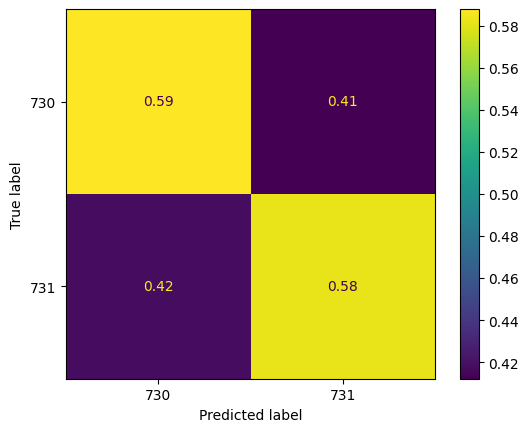

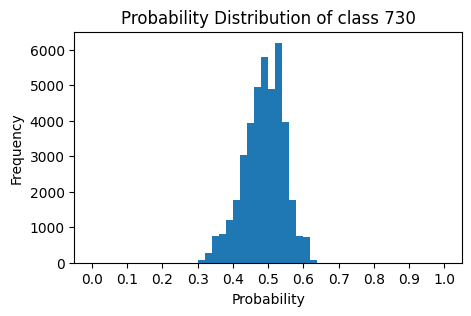

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier5.yaml
Train set: (163679, 6) (163679,)
Test set: (40921, 6) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5805571847507331
Accuracy train: 0.574038208933339
Accuracy test:  0.6333667310183035
Accuracy all:   0.5859042033235582
Accuracy: 0.574038208933339
Accuracy 730: 0.607717591857183
Accuracy 731: 0.5403592375366569
Integrated:  163679  percentual:  1.0 %


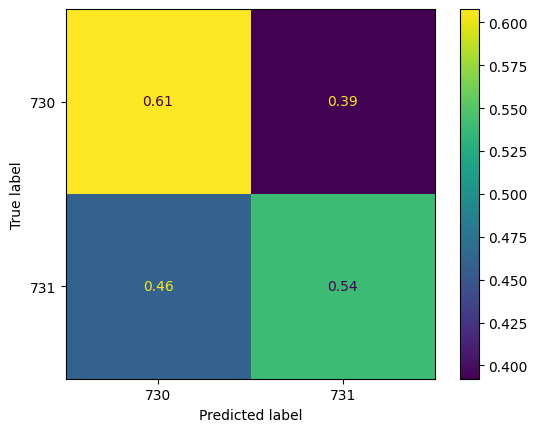

Accuracy: 0.6333667310183035
Accuracy 730: 0.6153169444308685
Accuracy 731: 0.6514173998044965
Integrated:  40921  percentual:  1.0 %


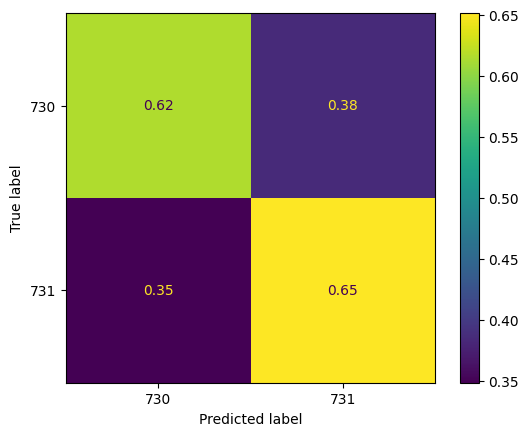

Accuracy: 0.5859042033235582
Accuracy 730: 0.6092375366568915
Accuracy 731: 0.5625708699902249
Integrated:  204600  percentual:  1.0 %


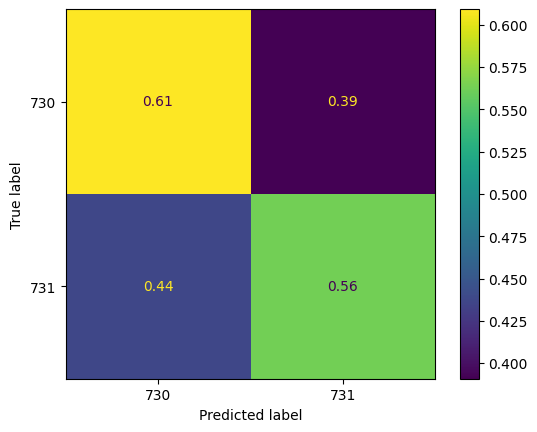

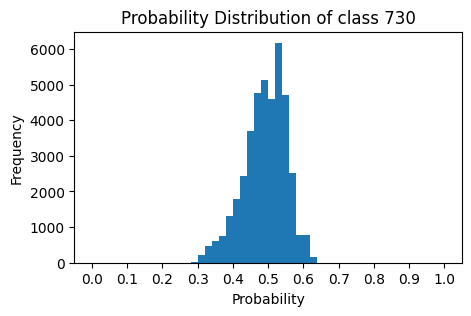

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier6.yaml
Train set: (163679, 7) (163679,)
Test set: (40921, 7) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5771260997067448
Accuracy train: 0.5783576390373841
Accuracy test:  0.6256200972605752
Accuracy all:   0.5878103616813294
Accuracy: 0.5783576390373841
Accuracy 730: 0.6083163284008847
Accuracy 731: 0.5483993157380254
Integrated:  163679  percentual:  1.0 %


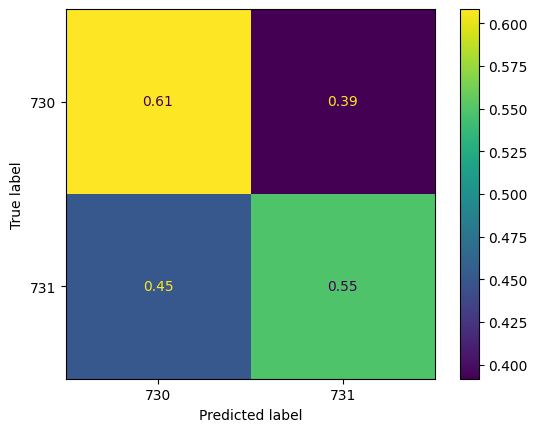

Accuracy: 0.6256200972605752
Accuracy 730: 0.5913689457993255
Accuracy 731: 0.6598729227761486
Integrated:  40921  percentual:  1.0 %


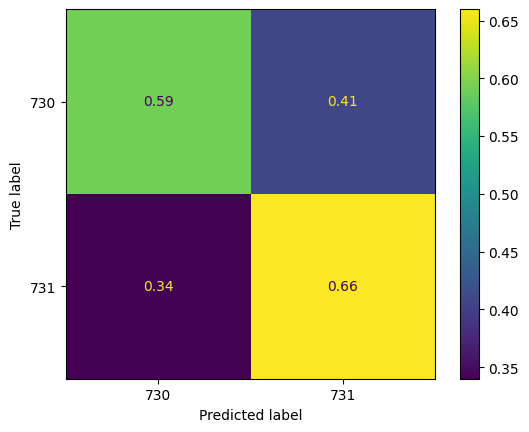

Accuracy: 0.5878103616813294
Accuracy 730: 0.6049266862170088
Accuracy 731: 0.57069403714565
Integrated:  204600  percentual:  1.0 %


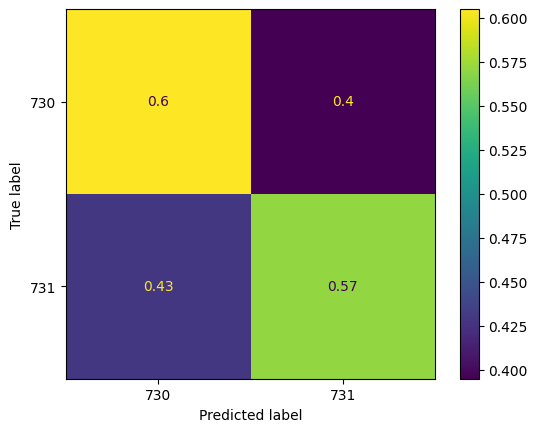

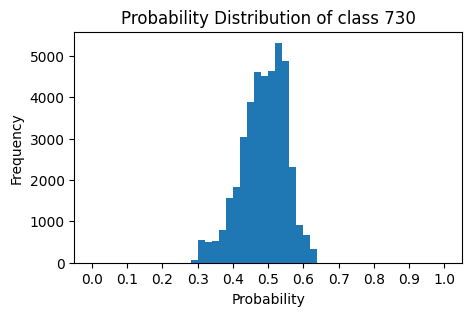

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier7.yaml
Train set: (163679, 8) (163679,)
Test set: (40921, 8) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5768475073313784
Accuracy train: 0.5654787724753939
Accuracy test:  0.6237139854842257
Accuracy all:   0.5771260997067449
Accuracy: 0.5654787724753939
Accuracy 730: 0.5535991397744352
Accuracy 731: 0.5773582600195504
Integrated:  163679  percentual:  1.0 %


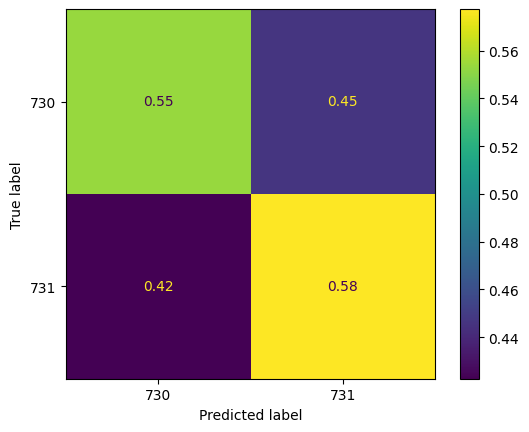

Accuracy: 0.6237139854842257
Accuracy 730: 0.5556424417183911
Accuracy 731: 0.6917888563049853
Integrated:  40921  percentual:  1.0 %


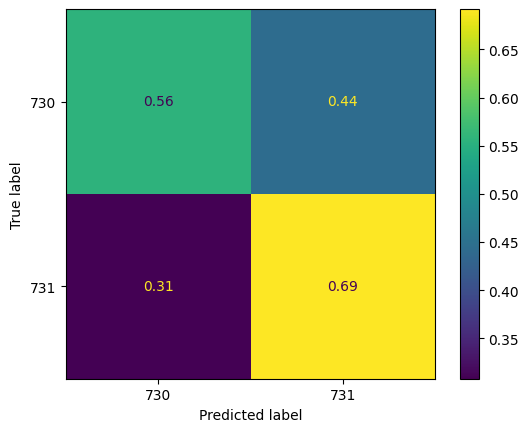

Accuracy: 0.5771260997067449
Accuracy 730: 0.5540078201368523
Accuracy 731: 0.6002443792766373
Integrated:  204600  percentual:  1.0 %


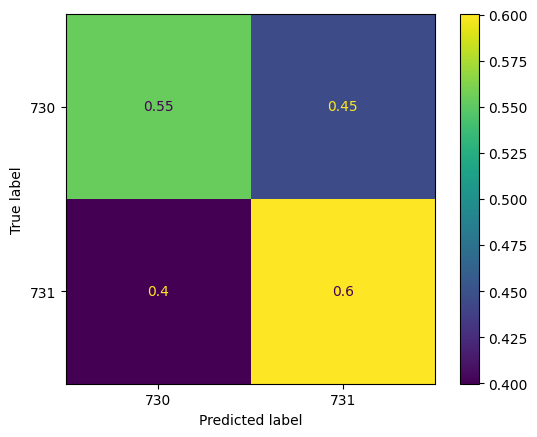

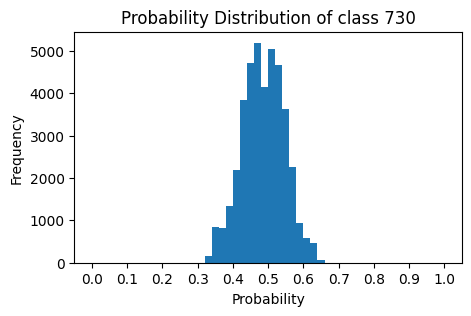

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier8.yaml
Train set: (163679, 9) (163679,)
Test set: (40921, 9) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.576197458455523
Accuracy train: 0.5685213130578755
Accuracy test:  0.6163827863444198
Accuracy all:   0.5780938416422288
Accuracy: 0.5685213130578755
Accuracy 730: 0.5497379000232163
Accuracy 731: 0.5873044965786901
Integrated:  163679  percentual:  1.0 %


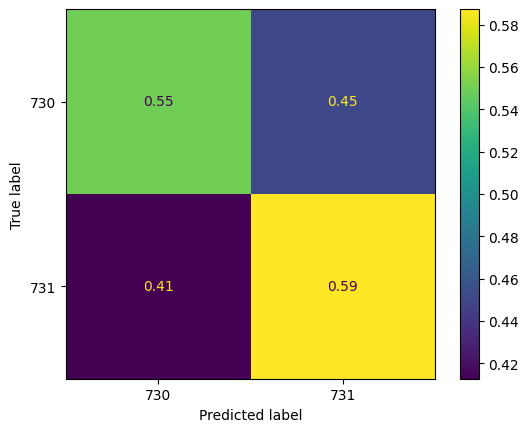

Accuracy: 0.6163827863444198
Accuracy 730: 0.5595523190459899
Accuracy 731: 0.6732160312805474
Integrated:  40921  percentual:  1.0 %


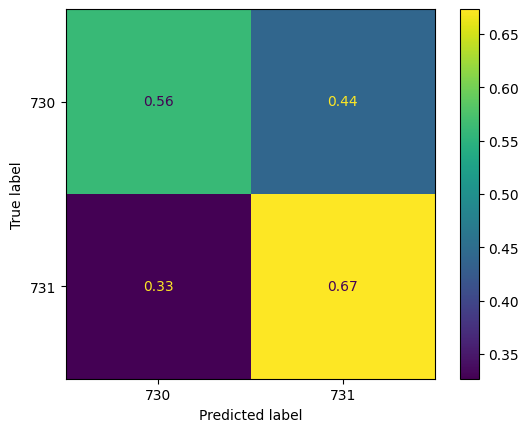

Accuracy: 0.5780938416422288
Accuracy 730: 0.551700879765396
Accuracy 731: 0.6044868035190616
Integrated:  204600  percentual:  1.0 %


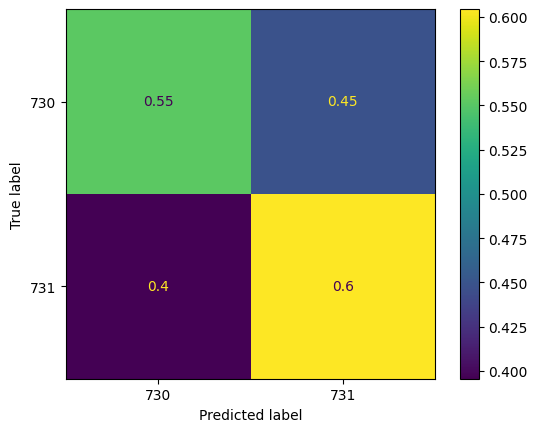

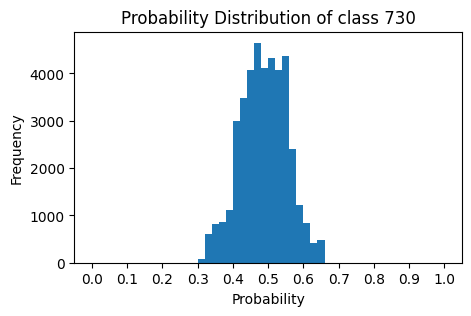

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier9.yaml
Train set: (163679, 10) (163679,)
Test set: (40921, 10) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5740371456500489
Accuracy train: 0.5657109342065872
Accuracy test:  0.6146232985508663
Accuracy all:   0.5754936461388074
Accuracy: 0.5657109342065872
Accuracy 730: 0.5482716064468041
Accuracy 731: 0.5831500488758553
Integrated:  163679  percentual:  1.0 %


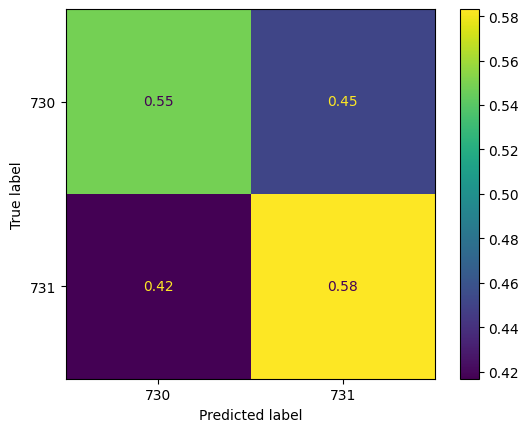

Accuracy: 0.6146232985508663
Accuracy 730: 0.5541273642539465
Accuracy 731: 0.6751221896383187
Integrated:  40921  percentual:  1.0 %


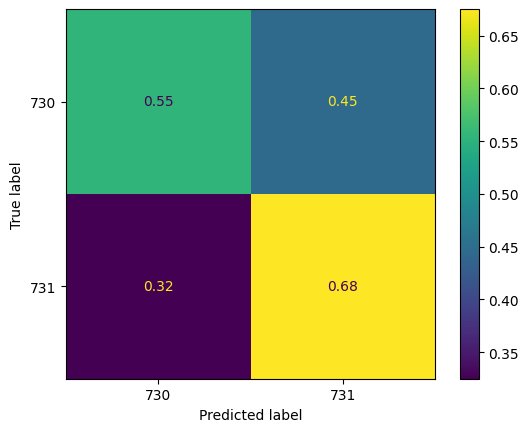

Accuracy: 0.5754936461388074
Accuracy 730: 0.5494428152492669
Accuracy 731: 0.601544477028348
Integrated:  204600  percentual:  1.0 %


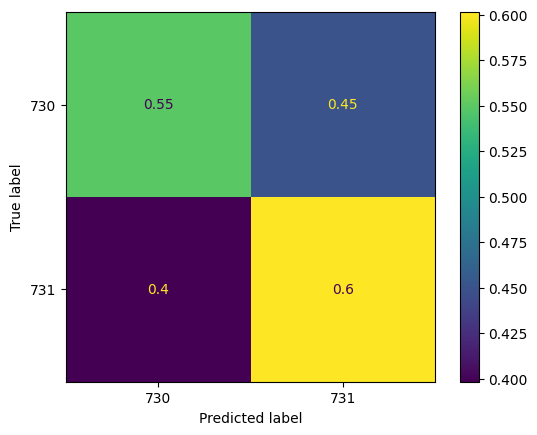

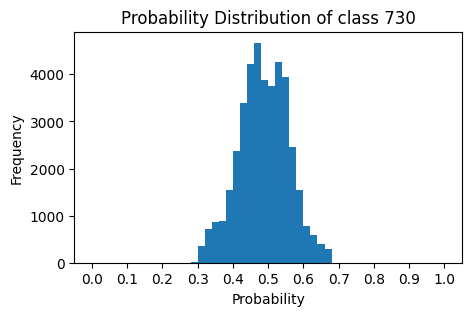

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier10.yaml
Train set: (163679, 11) (163679,)
Test set: (40921, 11) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5689638318670578
Accuracy train: 0.5634198644908632
Accuracy test:  0.6011094548031573
Accuracy all:   0.5709579667644183
Accuracy: 0.5634198644908632
Accuracy 730: 0.5421253925390095
Accuracy 731: 0.5847140762463343
Integrated:  163679  percentual:  1.0 %


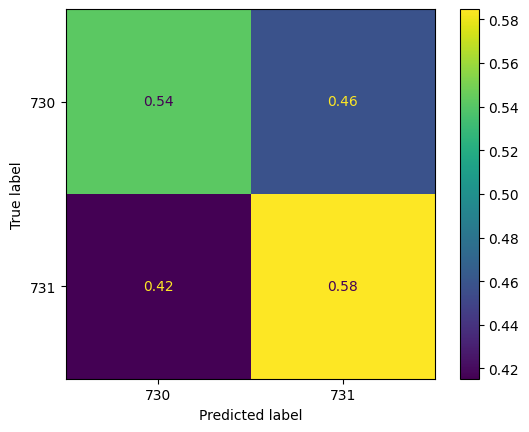

Accuracy: 0.6011094548031573
Accuracy 730: 0.5415180098724403
Accuracy 731: 0.6607038123167155
Integrated:  40921  percentual:  1.0 %


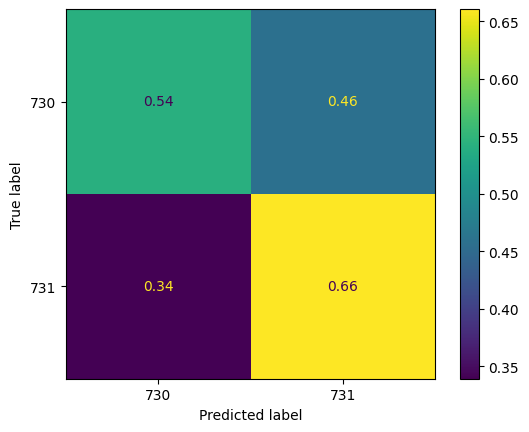

Accuracy: 0.5709579667644183
Accuracy 730: 0.5420039100684262
Accuracy 731: 0.5999120234604105
Integrated:  204600  percentual:  1.0 %


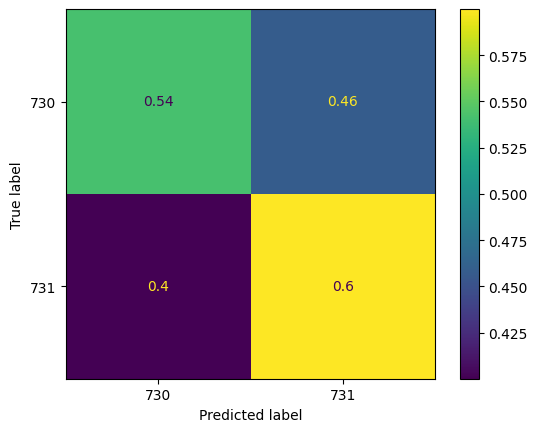

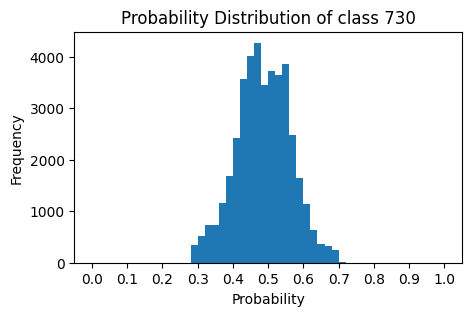

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier11.yaml
Train set: (163679, 12) (163679,)
Test set: (40921, 12) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5693695014662756
Accuracy train: 0.5730057001814527
Accuracy test:  0.600742894846167
Accuracy all:   0.578553274682307
Accuracy: 0.5730057001814527
Accuracy 730: 0.5803101210914112
Accuracy 731: 0.5657013685239491
Integrated:  163679  percentual:  1.0 %


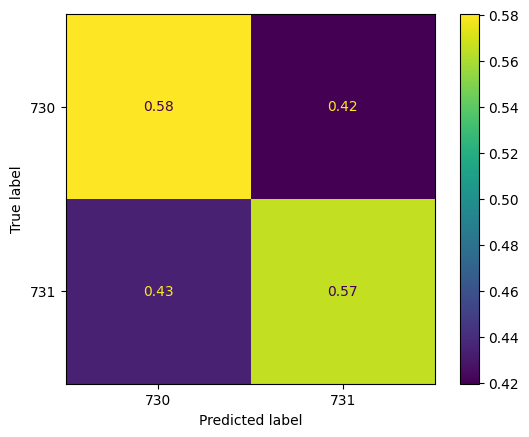

Accuracy: 0.600742894846167
Accuracy 730: 0.5638531841063487
Accuracy 731: 0.6376344086021506
Integrated:  40921  percentual:  1.0 %


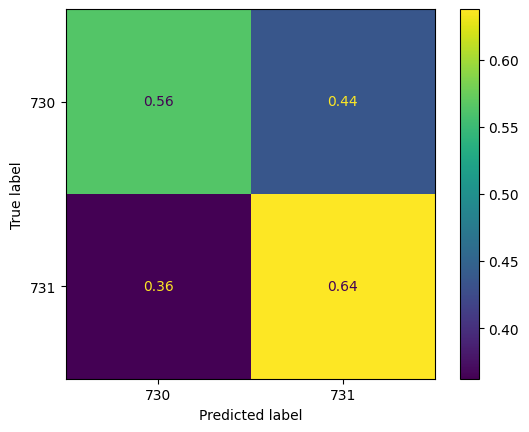

Accuracy: 0.578553274682307
Accuracy 730: 0.5770185728250244
Accuracy 731: 0.5800879765395894
Integrated:  204600  percentual:  1.0 %


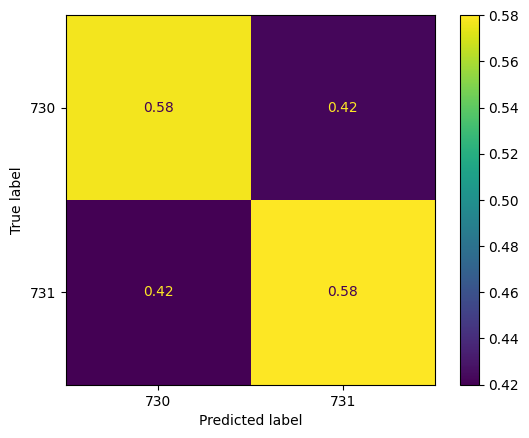

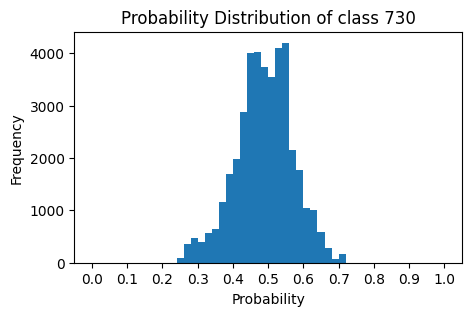

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier12.yaml
Train set: (163679, 13) (163679,)
Test set: (40921, 13) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5715982404692083
Accuracy train: 0.5716677154674699
Accuracy test:  0.6077808460203807
Accuracy all:   0.5788905180840664
Accuracy: 0.5716677154674699
Accuracy 730: 0.5786361025916739
Accuracy 731: 0.5646994134897361
Integrated:  163679  percentual:  1.0 %


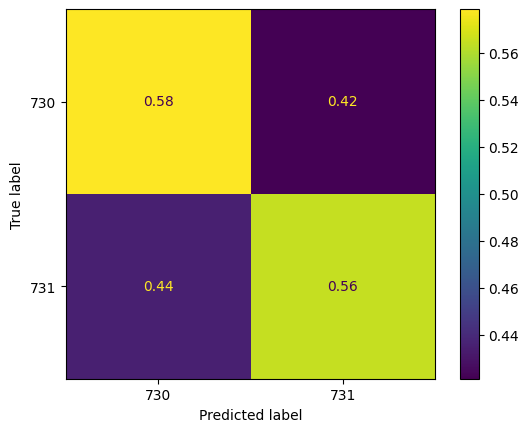

Accuracy: 0.6077808460203807
Accuracy 730: 0.5780753628854894
Accuracy 731: 0.6374877810361681
Integrated:  40921  percentual:  1.0 %


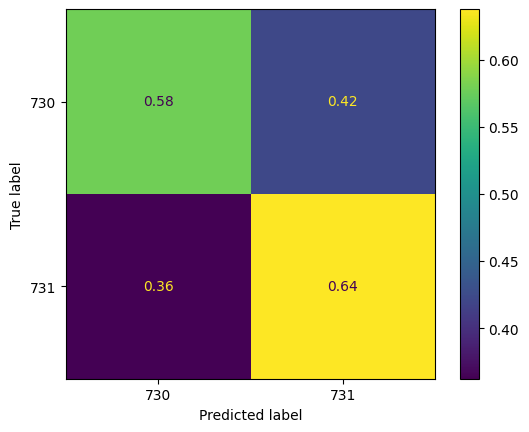

Accuracy: 0.5788905180840664
Accuracy 730: 0.5785239491691104
Accuracy 731: 0.5792570869990225
Integrated:  204600  percentual:  1.0 %


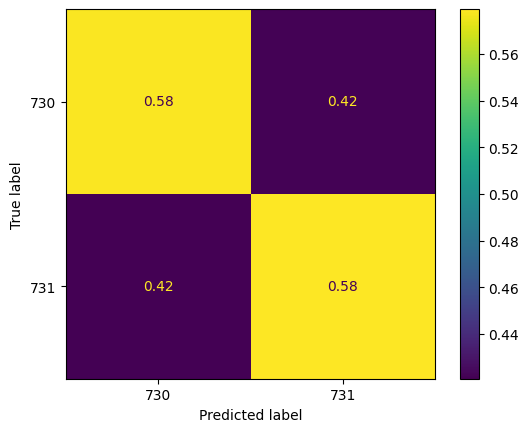

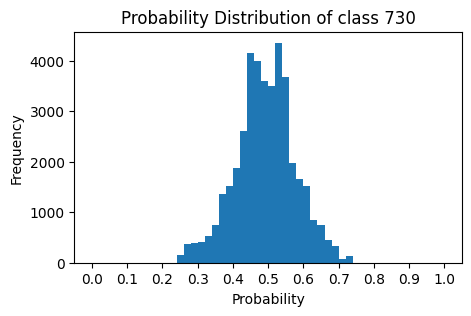

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier13.yaml
Train set: (163679, 14) (163679,)
Test set: (40921, 14) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5714662756598241
Accuracy train: 0.5717654677753408
Accuracy test:  0.6096380831357983
Accuracy all:   0.5793401759530792
Accuracy: 0.5717654677753408
Accuracy 730: 0.5779029558034677
Accuracy 731: 0.565628054740958
Integrated:  163679  percentual:  1.0 %


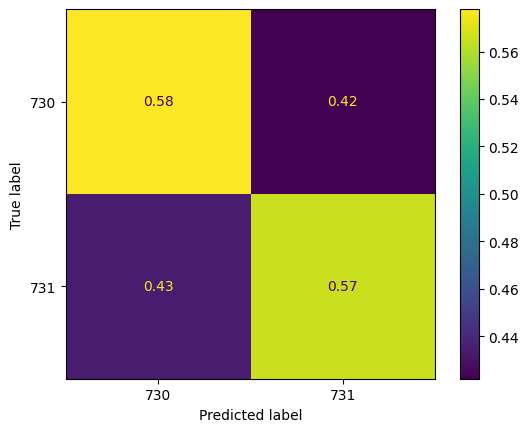

Accuracy: 0.6096380831357983
Accuracy 730: 0.5774888812863497
Accuracy 731: 0.6417888563049854
Integrated:  40921  percentual:  1.0 %


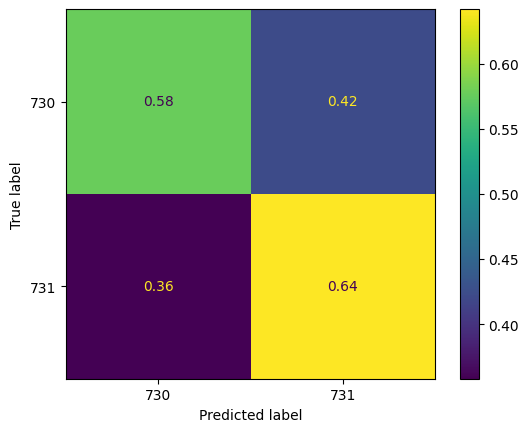

Accuracy: 0.5793401759530792
Accuracy 730: 0.577820136852395
Accuracy 731: 0.5808602150537634
Integrated:  204600  percentual:  1.0 %


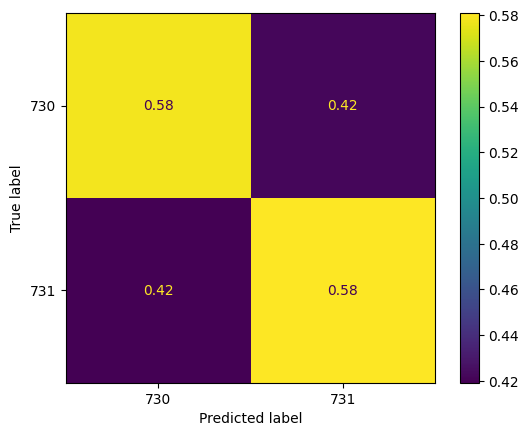

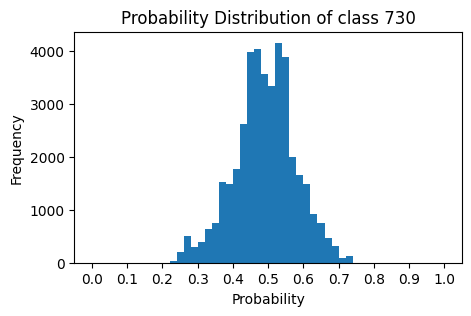

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier14.yaml
Train set: (163679, 15) (163679,)
Test set: (40921, 15) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5705180840664712
Accuracy train: 0.5745147514342096
Accuracy test:  0.6072920994110603
Accuracy all:   0.5810703812316715
Accuracy: 0.5745147514342096
Accuracy 730: 0.5787827319493151
Accuracy 731: 0.5702468230694037
Integrated:  163679  percentual:  1.0 %


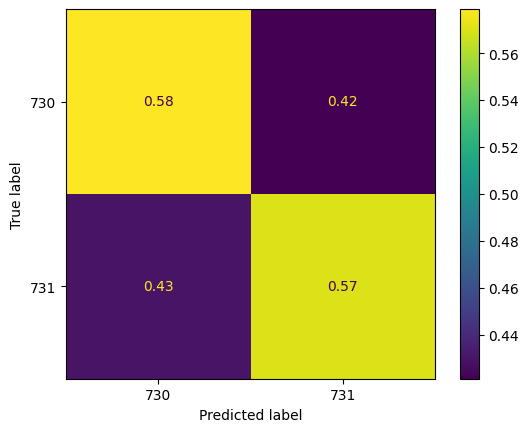

Accuracy: 0.6072920994110603
Accuracy 730: 0.5802257954156689
Accuracy 731: 0.6343597262952102
Integrated:  40921  percentual:  1.0 %


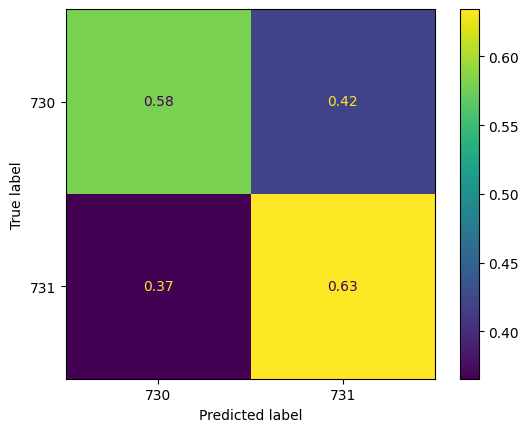

Accuracy: 0.5810703812316715
Accuracy 730: 0.5790713587487781
Accuracy 731: 0.5830694037145651
Integrated:  204600  percentual:  1.0 %


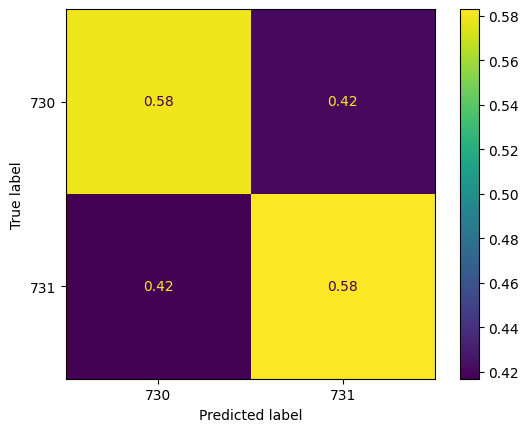

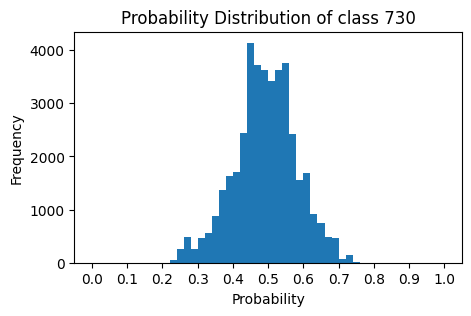

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier15.yaml
Train set: (163679, 16) (163679,)
Test set: (40921, 16) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.570366568914956
Accuracy train: 0.5736777472980651
Accuracy test:  0.6076342220375847
Accuracy all:   0.5804692082111437
Accuracy: 0.5736777472980651
Accuracy 730: 0.5759356785884481
Accuracy 731: 0.5714198435972629
Integrated:  163679  percentual:  1.0 %


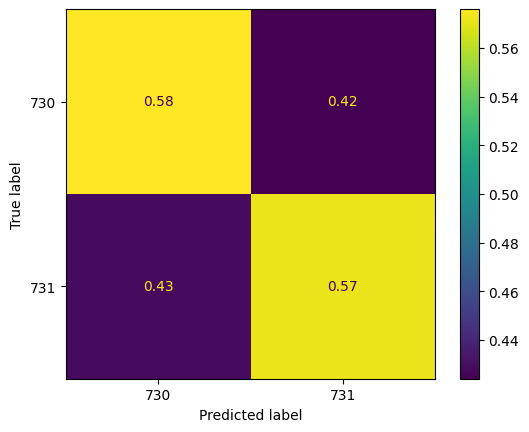

Accuracy: 0.6076342220375847
Accuracy 730: 0.5783197302184644
Accuracy 731: 0.636950146627566
Integrated:  40921  percentual:  1.0 %


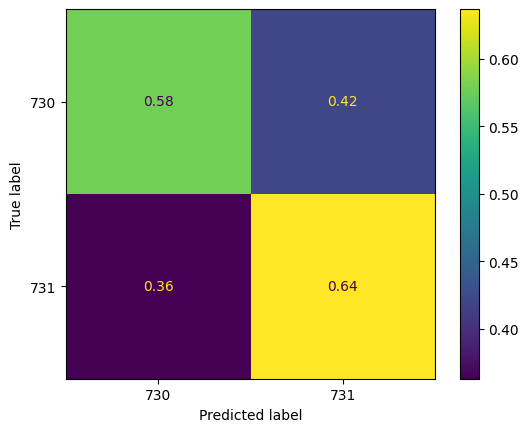

Accuracy: 0.5804692082111437
Accuracy 730: 0.5764125122189638
Accuracy 731: 0.5845259042033235
Integrated:  204600  percentual:  1.0 %


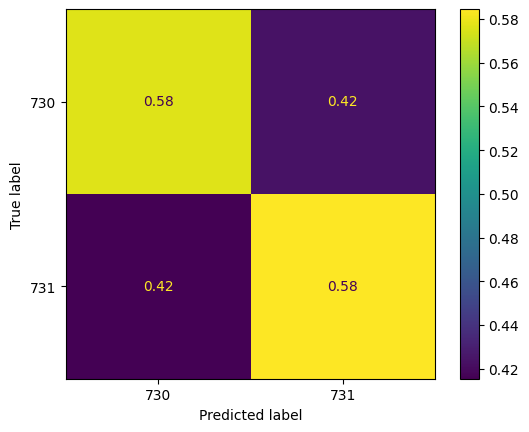

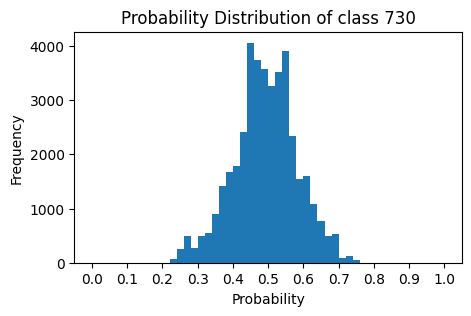

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier16.yaml
Train set: (163679, 17) (163679,)
Test set: (40921, 17) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5700537634408602
Accuracy train: 0.5753212079741445
Accuracy test:  0.6011583294640893
Accuracy all:   0.5804887585532746
Accuracy: 0.5753212079741445
Accuracy 730: 0.5725876415889735
Accuracy 731: 0.5780547409579667
Integrated:  163679  percentual:  1.0 %


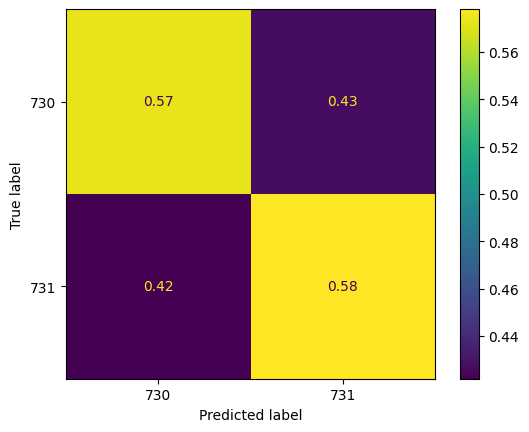

Accuracy: 0.6011583294640893
Accuracy 730: 0.5719173060945213
Accuracy 731: 0.6304007820136852
Integrated:  40921  percentual:  1.0 %


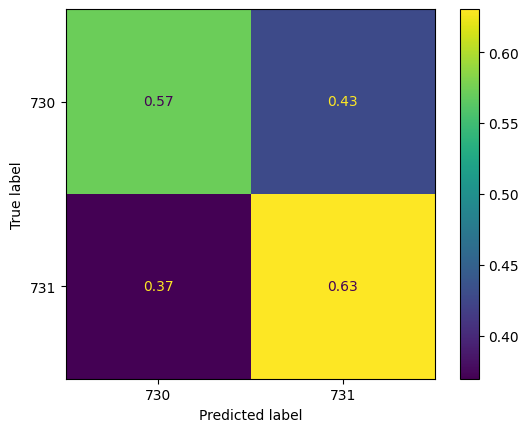

Accuracy: 0.5804887585532746
Accuracy 730: 0.572453567937439
Accuracy 731: 0.5885239491691104
Integrated:  204600  percentual:  1.0 %


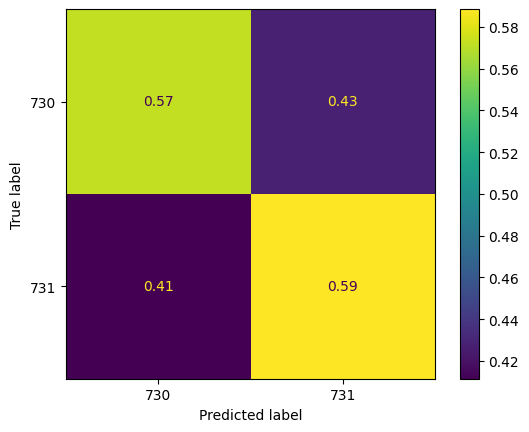

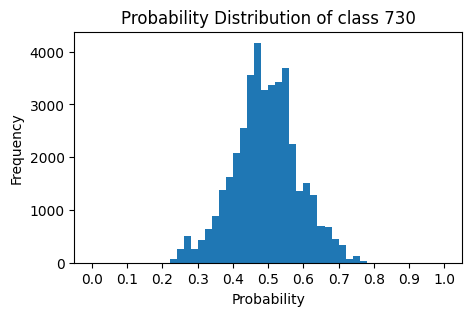

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier17.yaml
Train set: (163679, 18) (163679,)
Test set: (40921, 18) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5683577712609971
Accuracy train: 0.5749424177811449
Accuracy test:  0.5987879084088854
Accuracy all:   0.5797116324535679
Accuracy: 0.5749424177811449
Accuracy 730: 0.5718789330270408
Accuracy 731: 0.5780058651026393
Integrated:  163679  percentual:  1.0 %


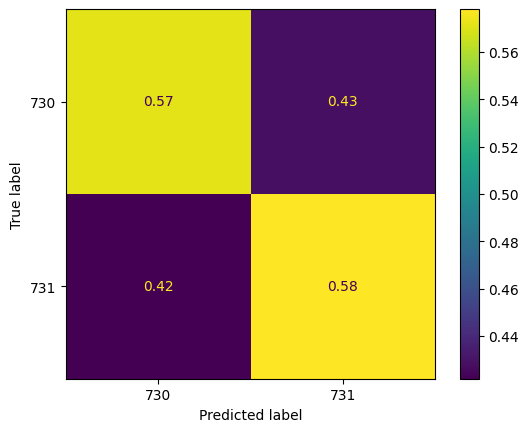

Accuracy: 0.5987879084088854
Accuracy 730: 0.5653193881041982
Accuracy 731: 0.632258064516129
Integrated:  40921  percentual:  1.0 %


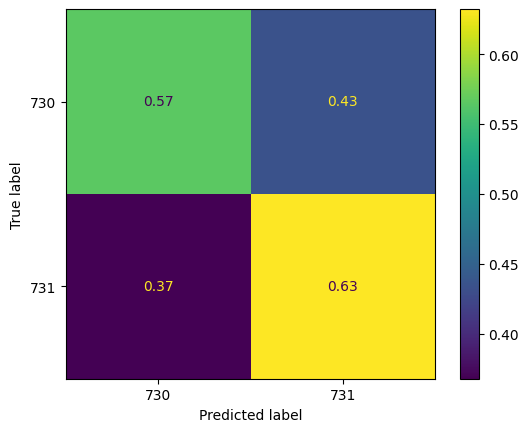

Accuracy: 0.5797116324535679
Accuracy 730: 0.5705669599217986
Accuracy 731: 0.5888563049853373
Integrated:  204600  percentual:  1.0 %


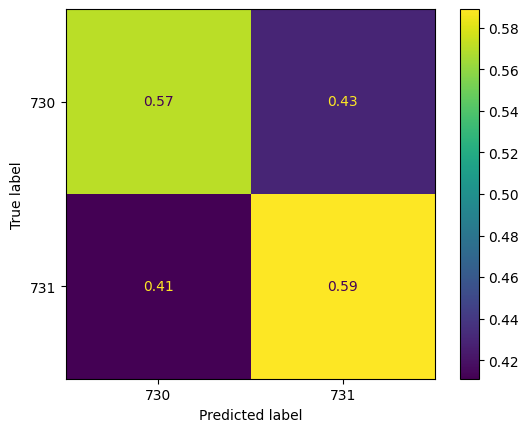

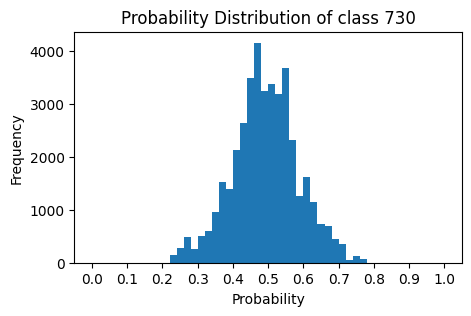

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier18.yaml
Train set: (163679, 19) (163679,)
Test set: (40921, 19) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5660410557184751
Accuracy train: 0.5750279510505318
Accuracy test:  0.5993744043400699
Accuracy all:   0.5798973607038124
Accuracy: 0.5750279510505318
Accuracy 730: 0.5737117999975562
Accuracy 731: 0.5763440860215053
Integrated:  163679  percentual:  1.0 %


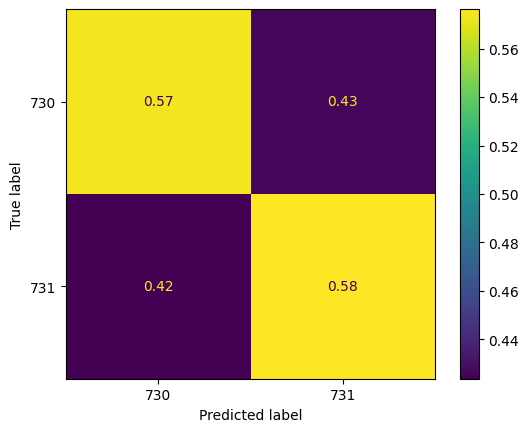

Accuracy: 0.5993744043400699
Accuracy 730: 0.5665900982356679
Accuracy 731: 0.6321603128054741
Integrated:  40921  percentual:  1.0 %


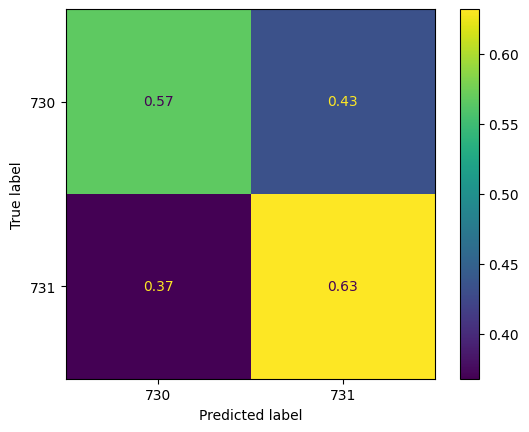

Accuracy: 0.5798973607038124
Accuracy 730: 0.5722873900293255
Accuracy 731: 0.5875073313782991
Integrated:  204600  percentual:  1.0 %


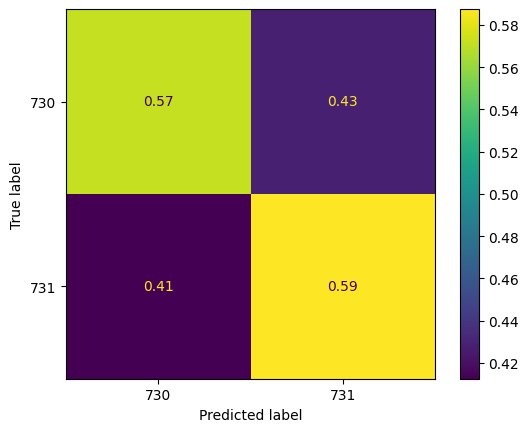

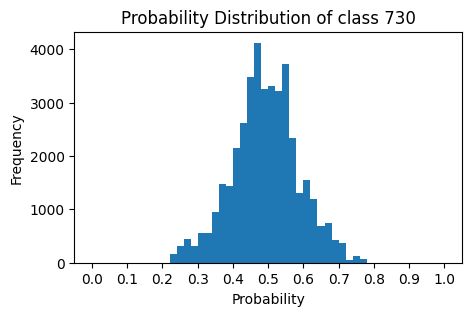

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier19.yaml
Train set: (163679, 20) (163679,)
Test set: (40921, 20) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.566505376344086
Accuracy train: 0.566181367188216
Accuracy test:  0.5938515676547494
Accuracy all:   0.5717155425219941
Accuracy: 0.566181367188216
Accuracy 730: 0.5497623382494898
Accuracy 731: 0.5826001955034213
Integrated:  163679  percentual:  1.0 %


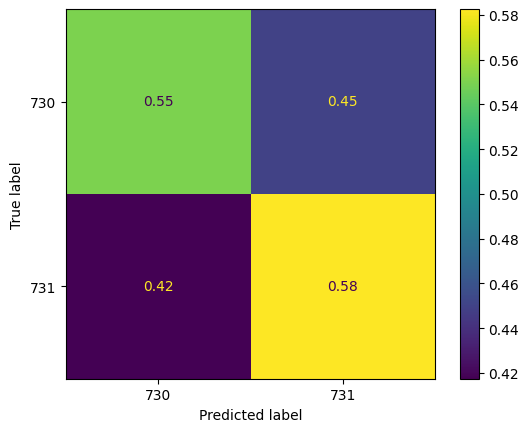

Accuracy: 0.5938515676547494
Accuracy 730: 0.5429842138702898
Accuracy 731: 0.6447214076246335
Integrated:  40921  percentual:  1.0 %


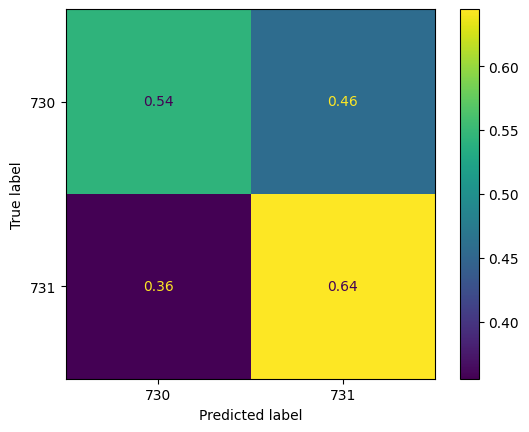

Accuracy: 0.5717155425219941
Accuracy 730: 0.5484066471163246
Accuracy 731: 0.5950244379276637
Integrated:  204600  percentual:  1.0 %


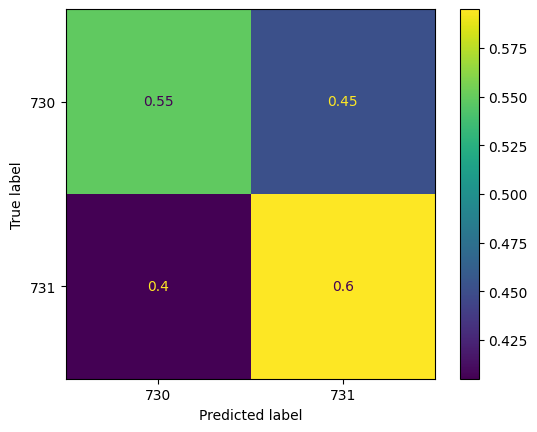

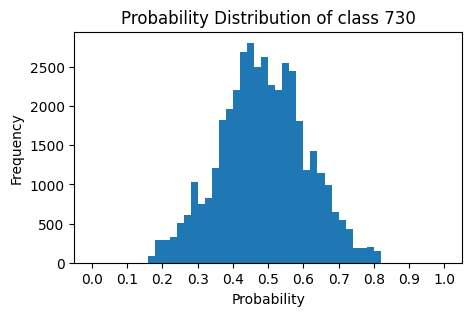

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier20.yaml
Train set: (163679, 21) (163679,)
Test set: (40921, 21) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5688660801564027
Accuracy train: 0.5752478937432414
Accuracy test:  0.6085384032648273
Accuracy all:   0.5819061583577713
Accuracy: 0.5752478937432414
Accuracy 730: 0.5865540879042999
Accuracy 731: 0.5639418377321603
Integrated:  163679  percentual:  1.0 %


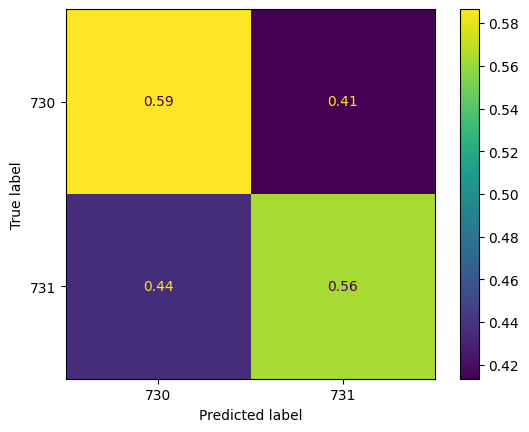

Accuracy: 0.6085384032648273
Accuracy 730: 0.5840867992766727
Accuracy 731: 0.632991202346041
Integrated:  40921  percentual:  1.0 %


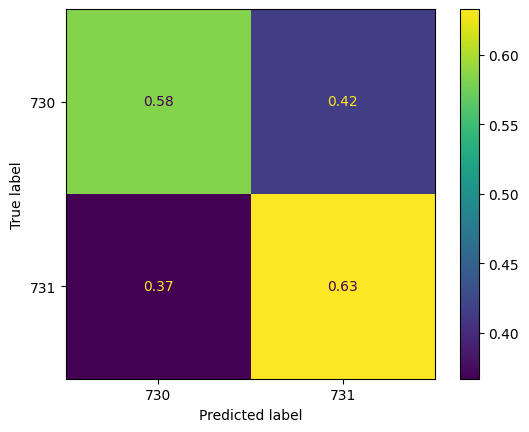

Accuracy: 0.5819061583577713
Accuracy 730: 0.5860606060606061
Accuracy 731: 0.5777517106549365
Integrated:  204600  percentual:  1.0 %


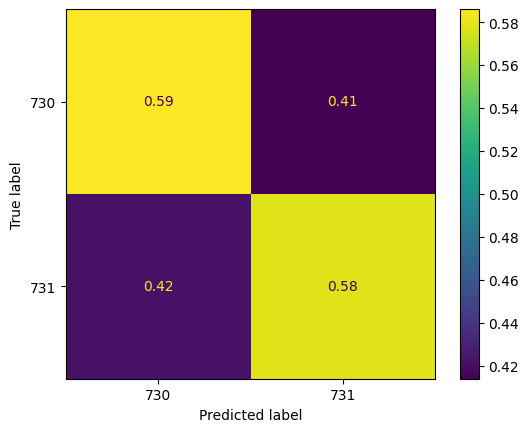

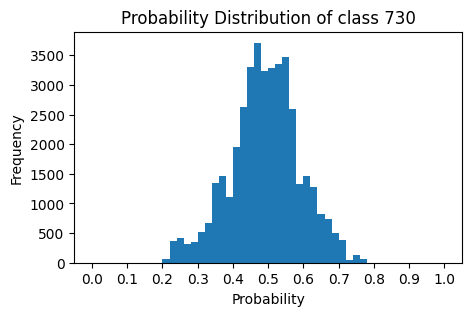

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier21.yaml
Train set: (163679, 22) (163679,)
Test set: (40921, 22) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5654154447702835
Accuracy train: 0.5751990175893059
Accuracy test:  0.6078297206813128
Accuracy all:   0.5817253176930596
Accuracy: 0.5751990175893059
Accuracy 730: 0.5873116729187795
Accuracy 731: 0.5630865102639296
Integrated:  163679  percentual:  1.0 %


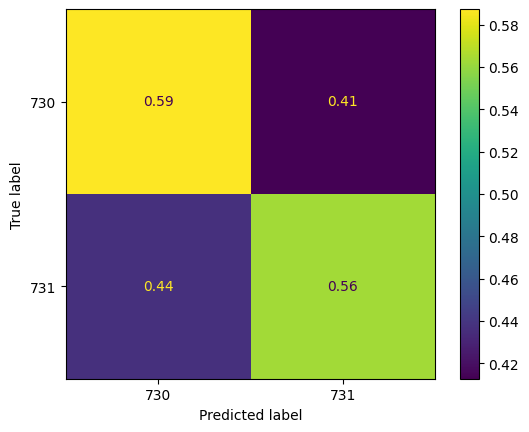

Accuracy: 0.6078297206813128
Accuracy 730: 0.5917599335320854
Accuracy 731: 0.623900293255132
Integrated:  40921  percentual:  1.0 %


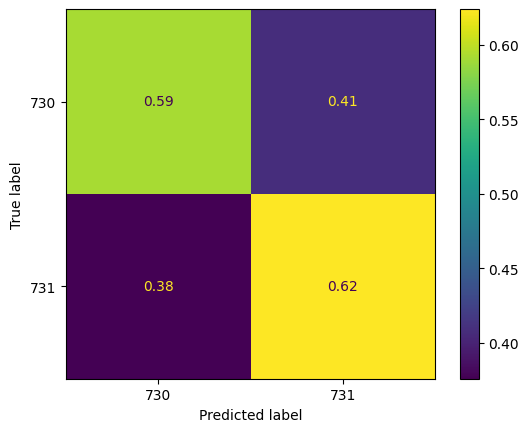

Accuracy: 0.5817253176930596
Accuracy 730: 0.5882013685239492
Accuracy 731: 0.57524926686217
Integrated:  204600  percentual:  1.0 %


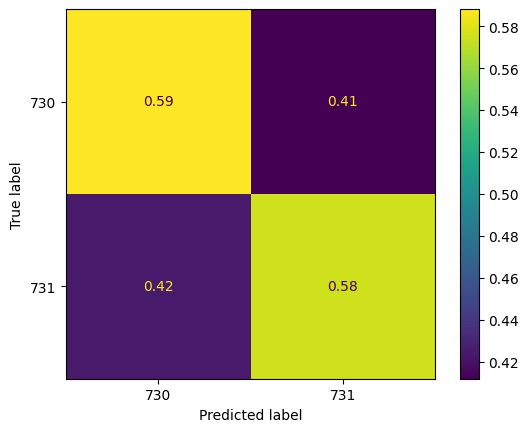

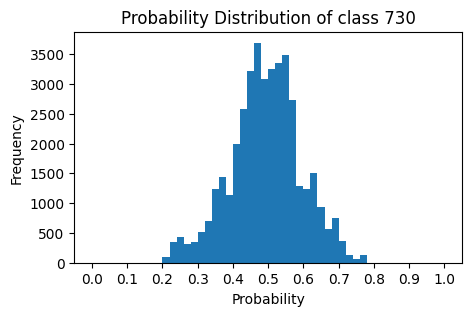

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier22.yaml
Train set: (163679, 23) (163679,)
Test set: (40921, 23) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5644379276637341
Accuracy train: 0.573427257009146
Accuracy test:  0.6078541580117788
Accuracy all:   0.5803128054740958
Accuracy: 0.573427257009146
Accuracy 730: 0.5888390620608757
Accuracy 731: 0.5580156402737048
Integrated:  163679  percentual:  1.0 %


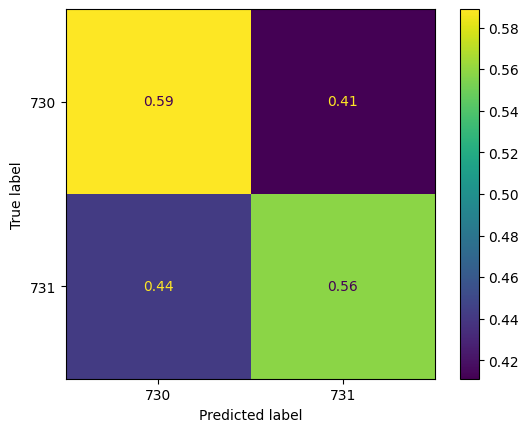

Accuracy: 0.6078541580117788
Accuracy 730: 0.5956698108596843
Accuracy 731: 0.6200391006842619
Integrated:  40921  percentual:  1.0 %


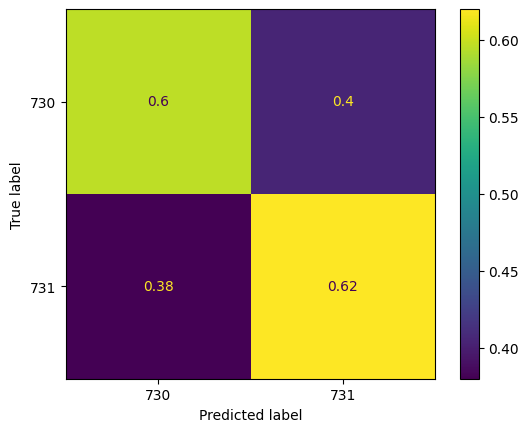

Accuracy: 0.5803128054740958
Accuracy 730: 0.5902052785923754
Accuracy 731: 0.5704203323558162
Integrated:  204600  percentual:  1.0 %


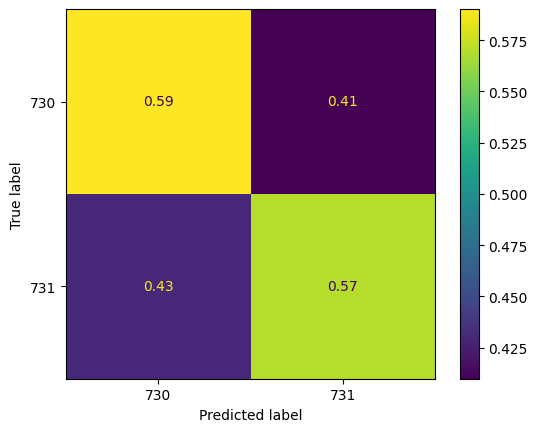

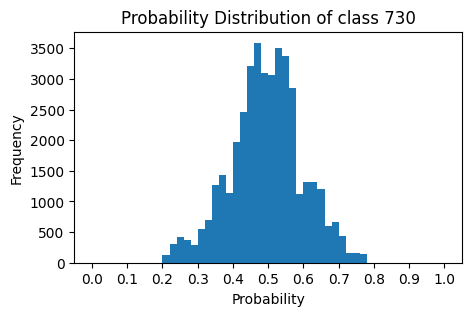

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier23.yaml
Train set: (163679, 24) (163679,)
Test set: (40921, 24) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5635679374389051
Accuracy train: 0.5728163050849528
Accuracy test:  0.6066811661494098
Accuracy all:   0.5795894428152493
Accuracy: 0.5728163050849528
Accuracy 730: 0.5891323207761581
Accuracy 731: 0.5565004887585533
Integrated:  163679  percentual:  1.0 %


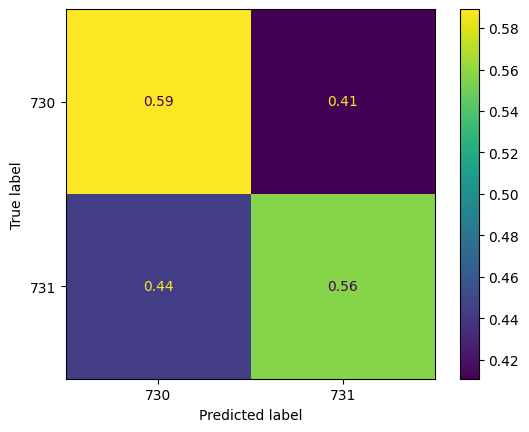

Accuracy: 0.6066811661494098
Accuracy 730: 0.5944968476614046
Accuracy 731: 0.6188660801564028
Integrated:  40921  percentual:  1.0 %


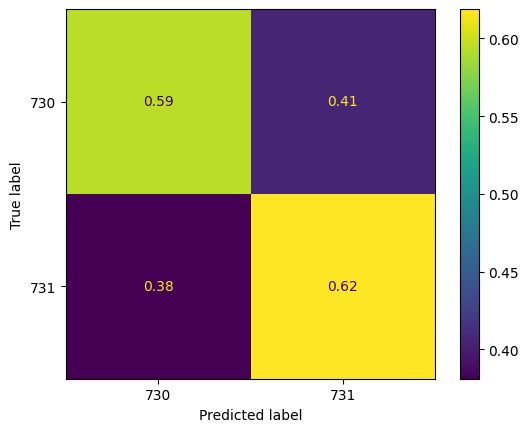

Accuracy: 0.5795894428152493
Accuracy 730: 0.5902052785923754
Accuracy 731: 0.5689736070381232
Integrated:  204600  percentual:  1.0 %


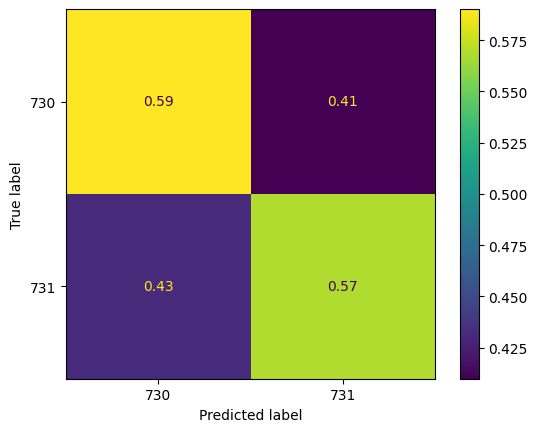

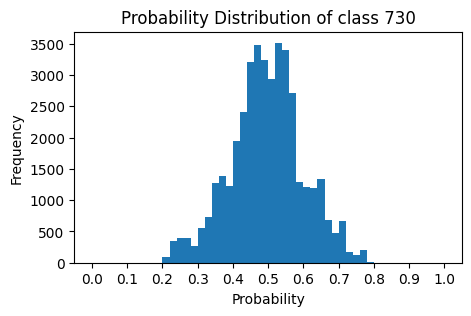

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier24.yaml
Train set: (163679, 25) (163679,)
Test set: (40921, 25) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5631329423264908
Accuracy train: 0.5728529622004045
Accuracy test:  0.6079030326727108
Accuracy all:   0.5798631476050831
Accuracy: 0.5728529622004045
Accuracy 730: 0.5885091460061829
Accuracy 731: 0.5571969696969697
Integrated:  163679  percentual:  1.0 %


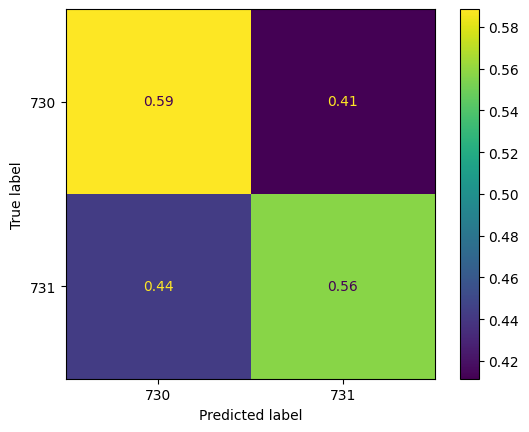

Accuracy: 0.6079030326727108
Accuracy 730: 0.5952299496603294
Accuracy 731: 0.6205767350928642
Integrated:  40921  percentual:  1.0 %


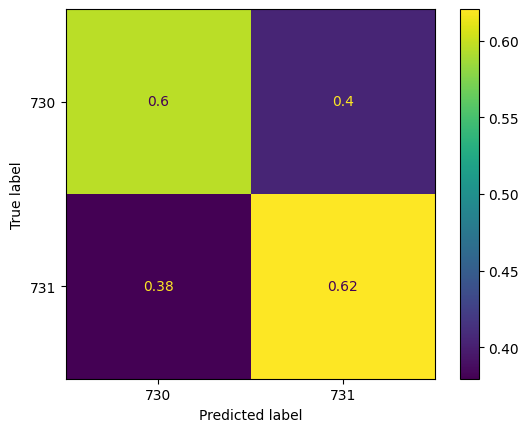

Accuracy: 0.5798631476050831
Accuracy 730: 0.5898533724340176
Accuracy 731: 0.5698729227761485
Integrated:  204600  percentual:  1.0 %


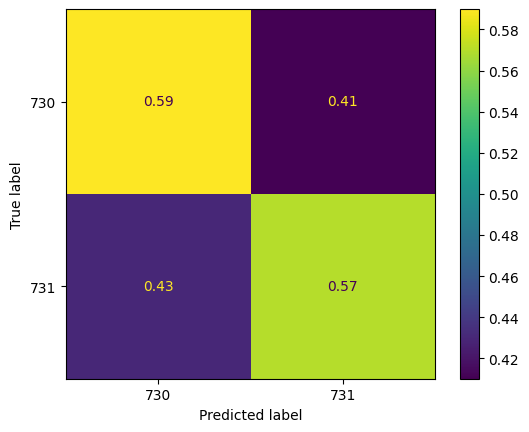

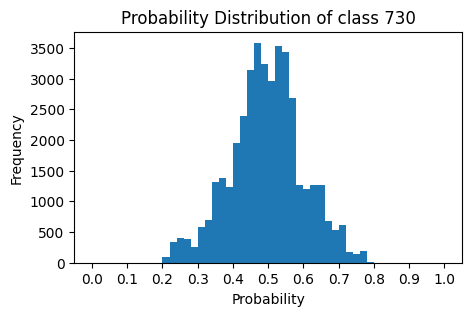

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier25.yaml
Train set: (163679, 26) (163679,)
Test set: (40921, 26) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5613587487781035
Accuracy train: 0.5735677759517104
Accuracy test:  0.6080252193250409
Accuracy all:   0.5804594330400782
Accuracy: 0.5735677759517104
Accuracy 730: 0.5891567590024316
Accuracy 731: 0.5579789833822092
Integrated:  163679  percentual:  1.0 %


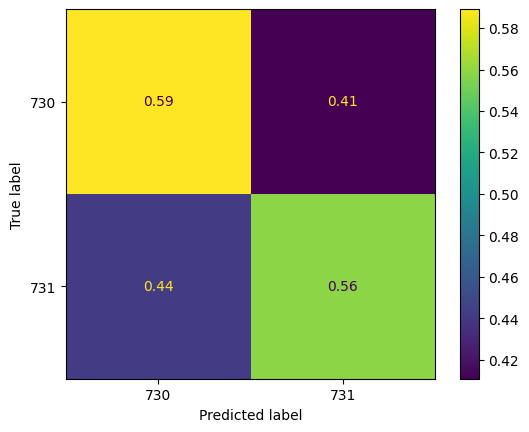

Accuracy: 0.6080252193250409
Accuracy 730: 0.5926885293973901
Accuracy 731: 0.6233626588465299
Integrated:  40921  percentual:  1.0 %


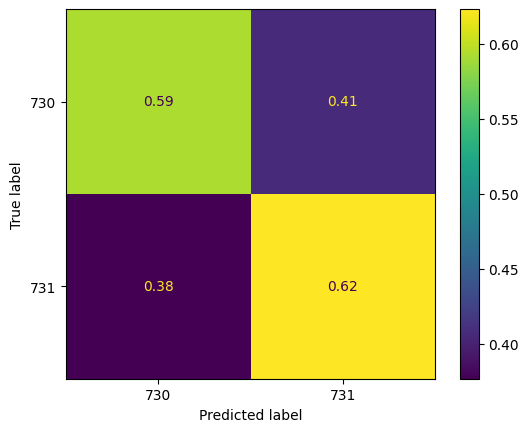

Accuracy: 0.5804594330400782
Accuracy 730: 0.5898631476050831
Accuracy 731: 0.5710557184750733
Integrated:  204600  percentual:  1.0 %


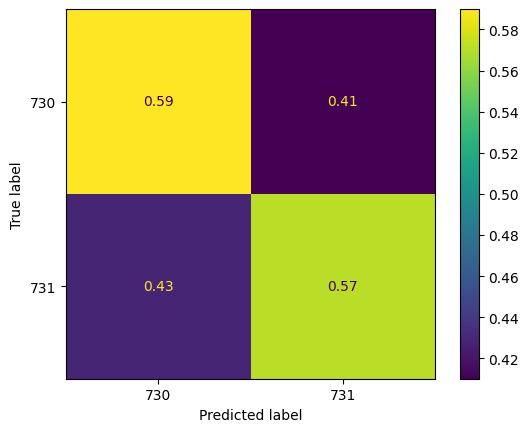

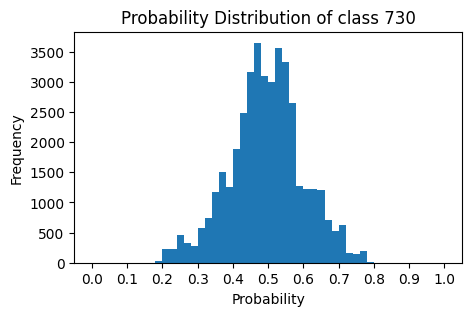

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier26.yaml
Train set: (163679, 27) (163679,)
Test set: (40921, 27) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5601319648093842
Accuracy train: 0.5723092149878726
Accuracy test:  0.6090760245350798
Accuracy all:   0.5796627565982405
Accuracy: 0.5723092149878726
Accuracy 730: 0.5919549359107515
Accuracy 731: 0.552663734115347
Integrated:  163679  percentual:  1.0 %


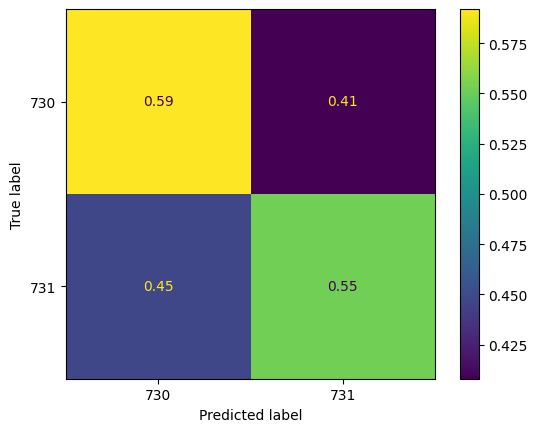

Accuracy: 0.6090760245350798
Accuracy 730: 0.5986510923219784
Accuracy 731: 0.6195014662756598
Integrated:  40921  percentual:  1.0 %


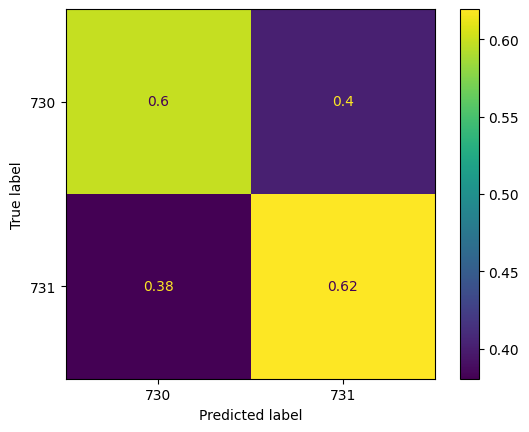

Accuracy: 0.5796627565982405
Accuracy 730: 0.5932942326490713
Accuracy 731: 0.5660312805474096
Integrated:  204600  percentual:  1.0 %


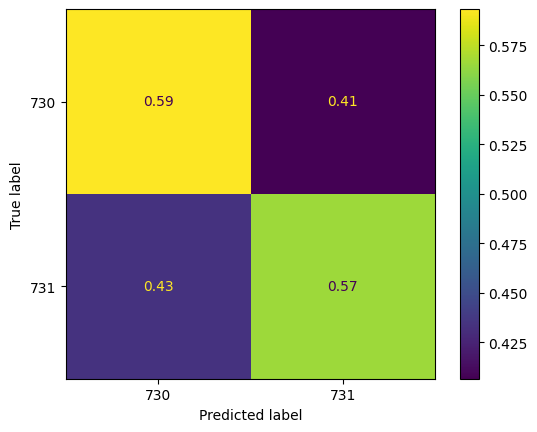

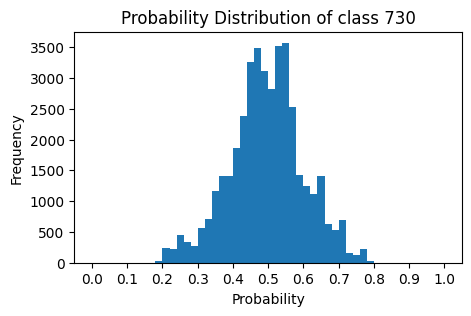

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier27.yaml
Train set: (163679, 28) (163679,)
Test set: (40921, 28) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5605669599217986
Accuracy train: 0.574838555954032
Accuracy test:  0.6101512670755846
Accuracy all:   0.5819012707722385
Accuracy: 0.574838555954032
Accuracy 730: 0.5979300822346314
Accuracy 731: 0.551747311827957
Integrated:  163679  percentual:  1.0 %


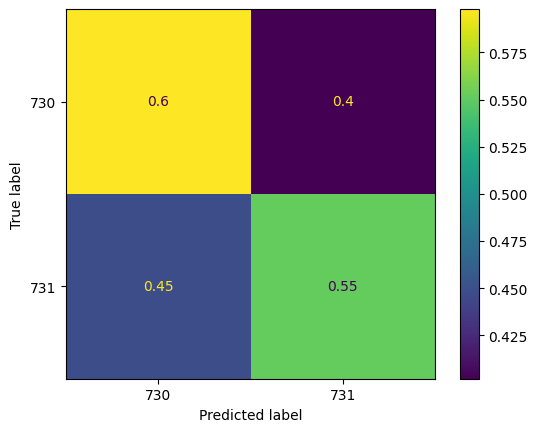

Accuracy: 0.6101512670755846
Accuracy 730: 0.6014857533844875
Accuracy 731: 0.6188172043010752
Integrated:  40921  percentual:  1.0 %


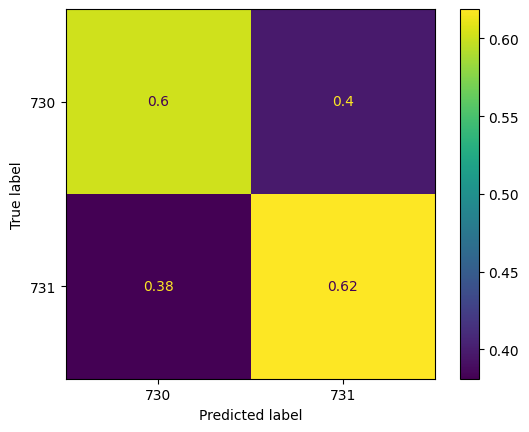

Accuracy: 0.5819012707722385
Accuracy 730: 0.5986412512218964
Accuracy 731: 0.5651612903225807
Integrated:  204600  percentual:  1.0 %


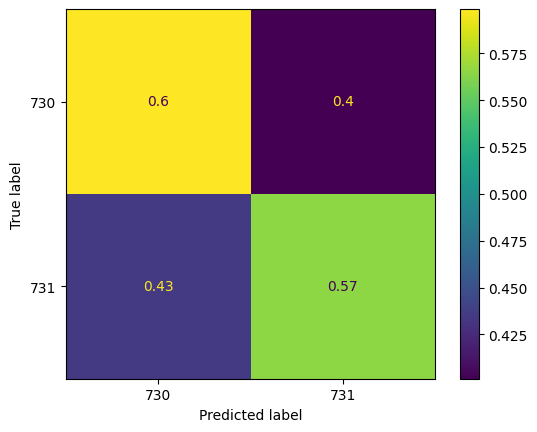

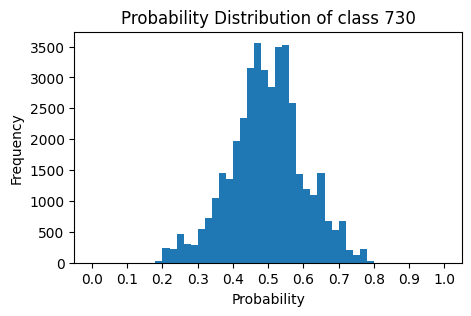

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier28.yaml
Train set: (163679, 29) (163679,)
Test set: (40921, 29) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5598191593352884
Accuracy train: 0.5749790748965964
Accuracy test:  0.6110798856332934
Accuracy all:   0.582199413489736
Accuracy: 0.5749790748965964
Accuracy 730: 0.5984066276469654
Accuracy 731: 0.5515518084066471
Integrated:  163679  percentual:  1.0 %


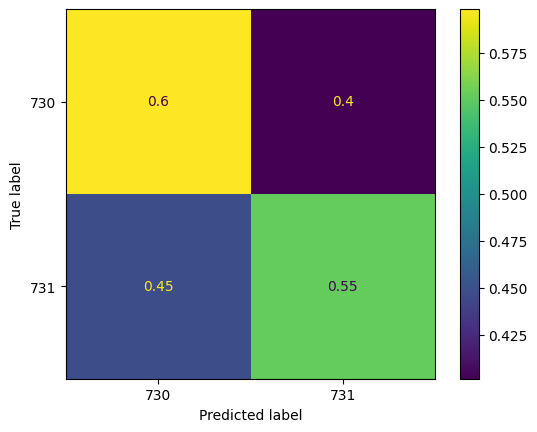

Accuracy: 0.6110798856332934
Accuracy 730: 0.6021211084502224
Accuracy 731: 0.6200391006842619
Integrated:  40921  percentual:  1.0 %


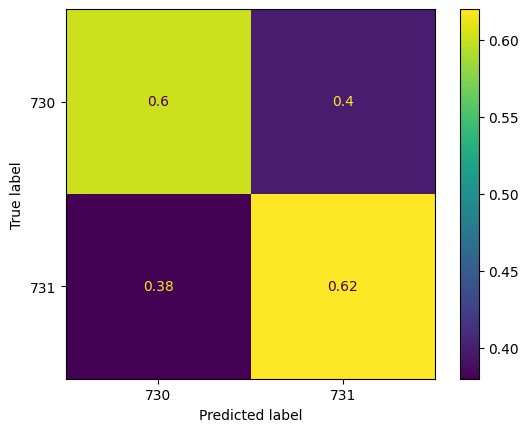

Accuracy: 0.582199413489736
Accuracy 730: 0.599149560117302
Accuracy 731: 0.5652492668621701
Integrated:  204600  percentual:  1.0 %


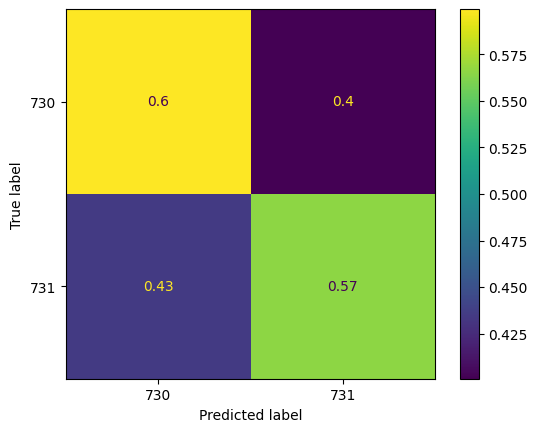

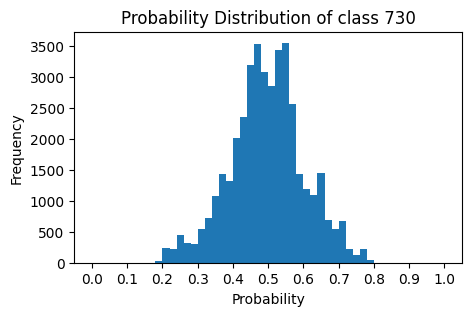

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier29.yaml
Train set: (163679, 30) (163679,)
Test set: (40921, 30) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5583186705767351
Accuracy train: 0.5764209214376921
Accuracy test:  0.611910754869138
Accuracy all:   0.5835190615835777
Accuracy: 0.5764209214376921
Accuracy 730: 0.5995552242818216
Accuracy 731: 0.5532869012707723
Integrated:  163679  percentual:  1.0 %


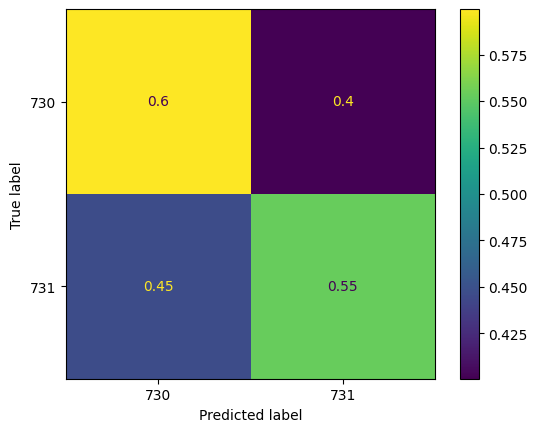

Accuracy: 0.611910754869138
Accuracy 730: 0.6002150432530179
Accuracy 731: 0.6236070381231672
Integrated:  40921  percentual:  1.0 %


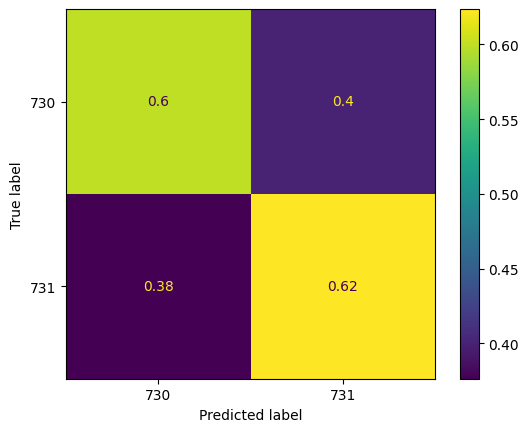

Accuracy: 0.5835190615835777
Accuracy 730: 0.5996871945259042
Accuracy 731: 0.5673509286412513
Integrated:  204600  percentual:  1.0 %


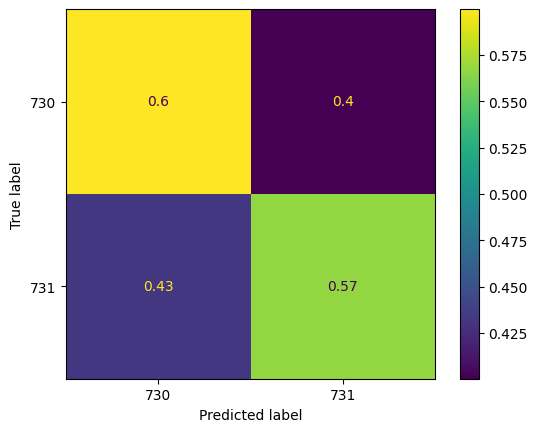

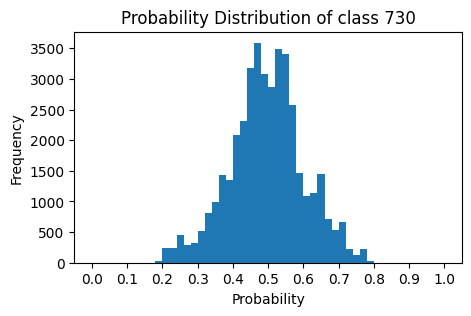

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier30.yaml
Train set: (163679, 31) (163679,)
Test set: (40921, 31) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.556427174975562
Accuracy train: 0.5768852449000789
Accuracy test:  0.6123750641479925
Accuracy all:   0.5839833822091887
Accuracy: 0.5768852449000789
Accuracy 730: 0.6014614059311575
Accuracy 731: 0.5523093841642229
Integrated:  163679  percentual:  1.0 %


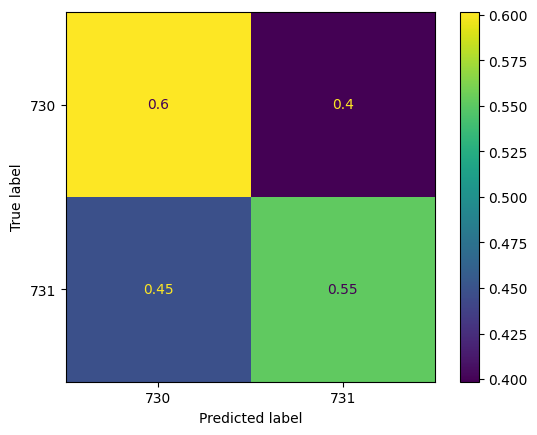

Accuracy: 0.6123750641479925
Accuracy 730: 0.6041249205806167
Accuracy 731: 0.6206256109481916
Integrated:  40921  percentual:  1.0 %


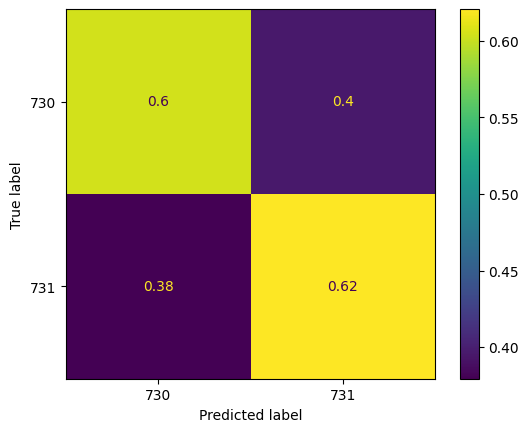

Accuracy: 0.5839833822091887
Accuracy 730: 0.6019941348973608
Accuracy 731: 0.5659726295210166
Integrated:  204600  percentual:  1.0 %


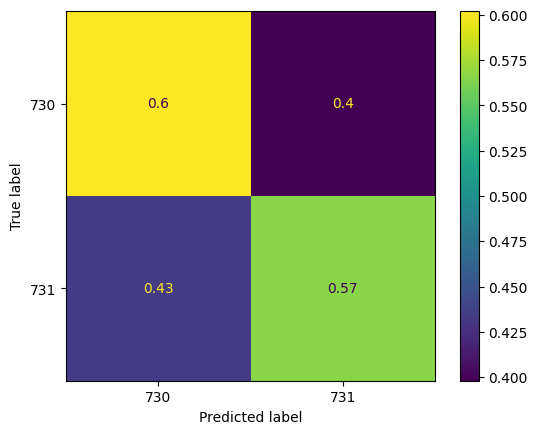

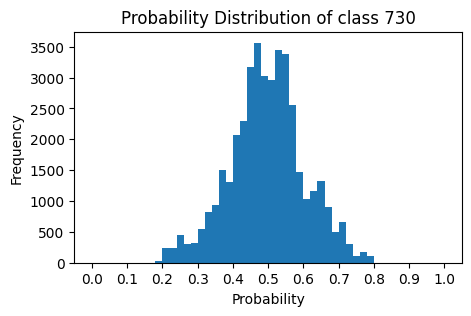

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier31.yaml
Train set: (163679, 32) (163679,)
Test set: (40921, 32) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.556564027370479
Accuracy train: 0.5796284190397057
Accuracy test:  0.6121306908433323
Accuracy all:   0.5861290322580646
Accuracy: 0.5796284190397057
Accuracy 730: 0.6049438531751365
Accuracy 731: 0.5543132942326491
Integrated:  163679  percentual:  1.0 %


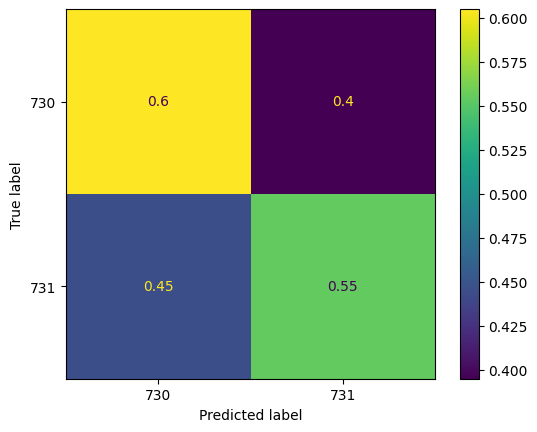

Accuracy: 0.6121306908433323
Accuracy 730: 0.6053956307120865
Accuracy 731: 0.6188660801564028
Integrated:  40921  percentual:  1.0 %


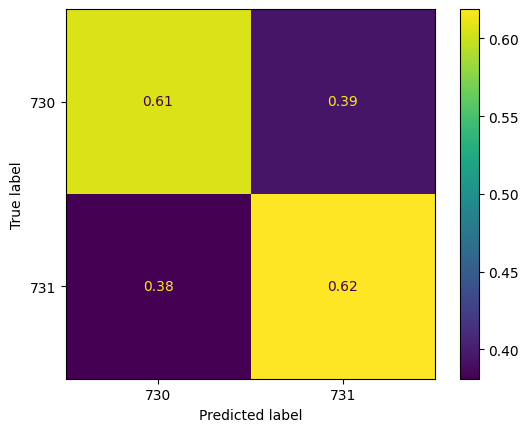

Accuracy: 0.5861290322580646
Accuracy 730: 0.6050342130987292
Accuracy 731: 0.5672238514173998
Integrated:  204600  percentual:  1.0 %


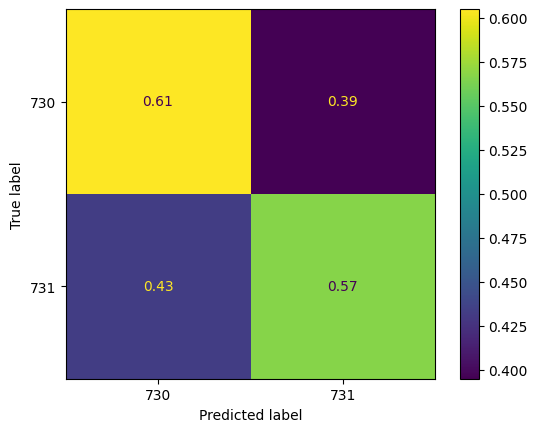

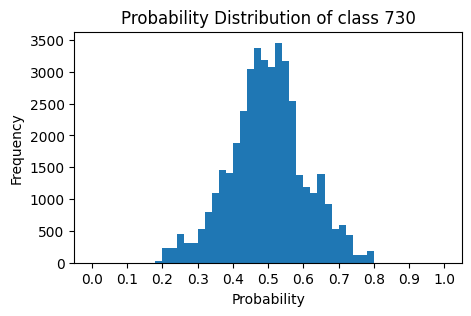

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier32.yaml
Train set: (163679, 33) (163679,)
Test set: (40921, 33) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5569354838709678
Accuracy train: 0.5803249042332859
Accuracy test:  0.6112998216074876
Accuracy all:   0.5865200391006843
Accuracy: 0.5803249042332859
Accuracy 730: 0.6071677317660285
Accuracy 731: 0.5534824046920821
Integrated:  163679  percentual:  1.0 %


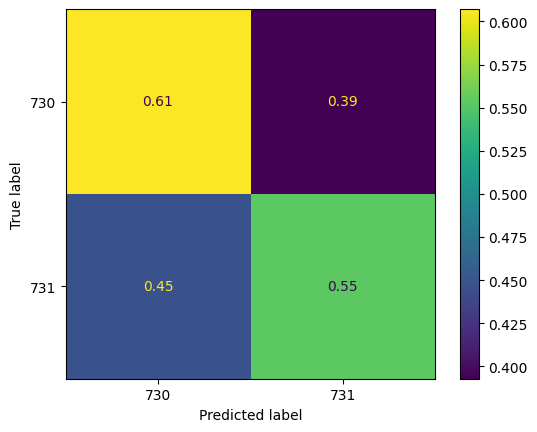

Accuracy: 0.6112998216074876
Accuracy 730: 0.6052001368457065
Accuracy 731: 0.6173998044965787
Integrated:  40921  percentual:  1.0 %


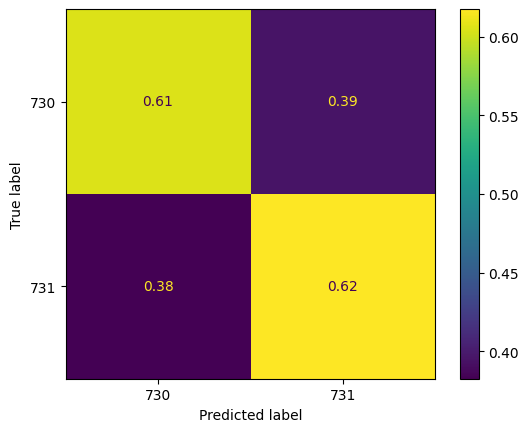

Accuracy: 0.5865200391006843
Accuracy 730: 0.6067741935483871
Accuracy 731: 0.5662658846529814
Integrated:  204600  percentual:  1.0 %


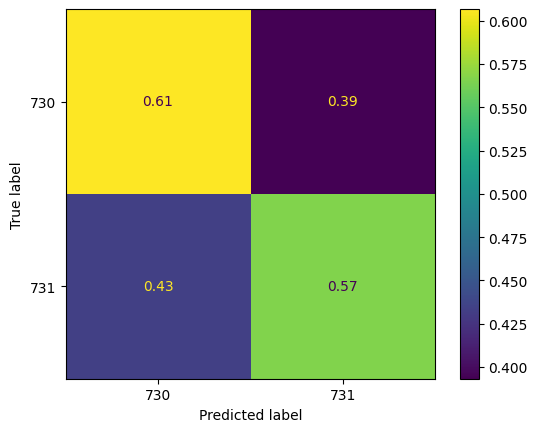

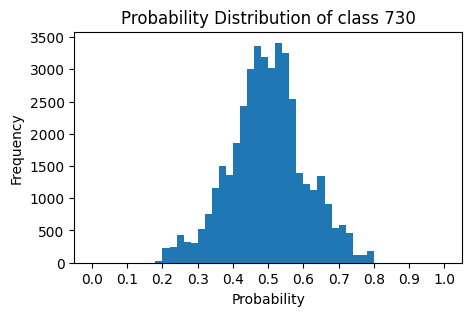

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier33.yaml
Train set: (163679, 34) (163679,)
Test set: (40921, 34) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5553274682306941
Accuracy train: 0.5792801764429157
Accuracy test:  0.6083429046210992
Accuracy all:   0.5850928641251222
Accuracy: 0.5792801764429157
Accuracy 730: 0.6041496108212466
Accuracy 731: 0.554411045943304
Integrated:  163679  percentual:  1.0 %


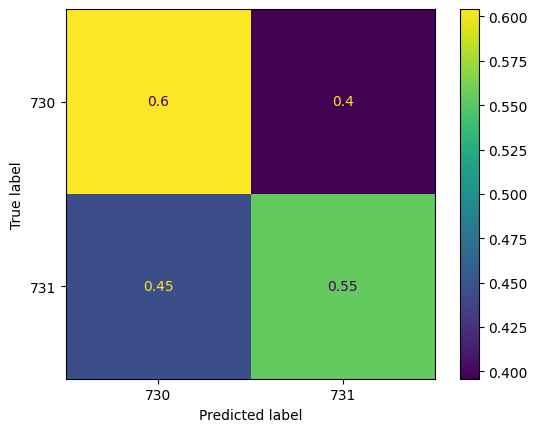

Accuracy: 0.6083429046210992
Accuracy 730: 0.6043204144469967
Accuracy 731: 0.6123655913978494
Integrated:  40921  percentual:  1.0 %


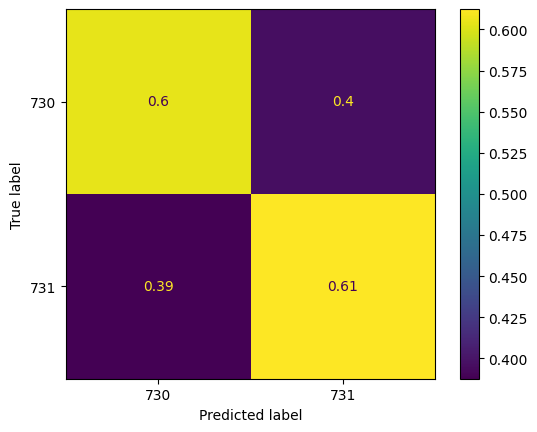

Accuracy: 0.5850928641251222
Accuracy 730: 0.6041837732160312
Accuracy 731: 0.5660019550342131
Integrated:  204600  percentual:  1.0 %


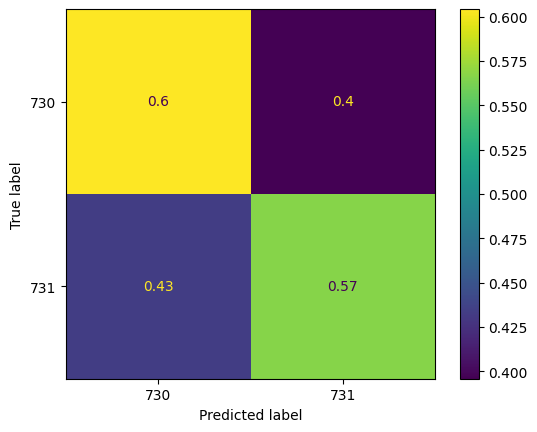

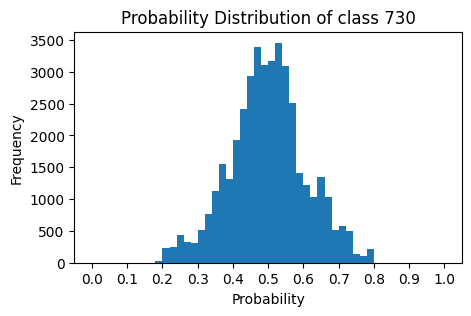

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier34.yaml
Train set: (163679, 35) (163679,)
Test set: (40921, 35) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5531964809384163
Accuracy train: 0.5800010997134636
Accuracy test:  0.6035776251802253
Accuracy all:   0.5847165200391007
Accuracy: 0.5800010997134636
Accuracy 730: 0.5970258678625106
Accuracy 731: 0.5629765395894428
Integrated:  163679  percentual:  1.0 %


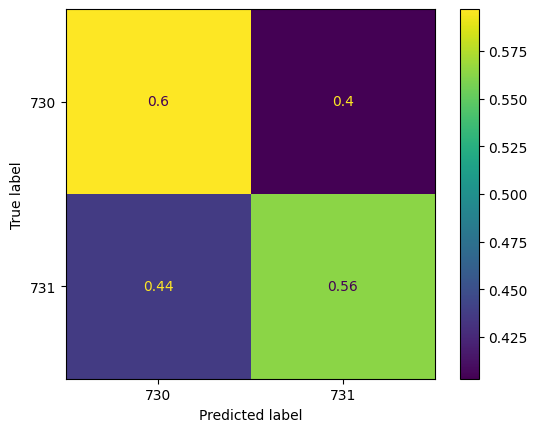

Accuracy: 0.6035776251802253
Accuracy 730: 0.5872635746053467
Accuracy 731: 0.6198924731182796
Integrated:  40921  percentual:  1.0 %


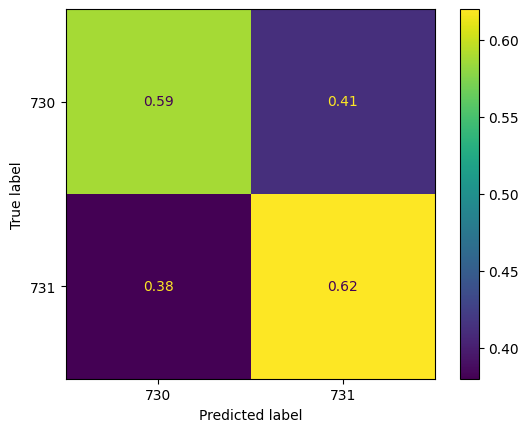

Accuracy: 0.5847165200391007
Accuracy 730: 0.5950733137829912
Accuracy 731: 0.5743597262952101
Integrated:  204600  percentual:  1.0 %


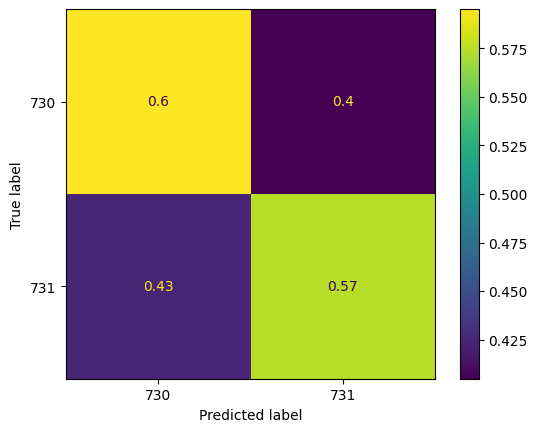

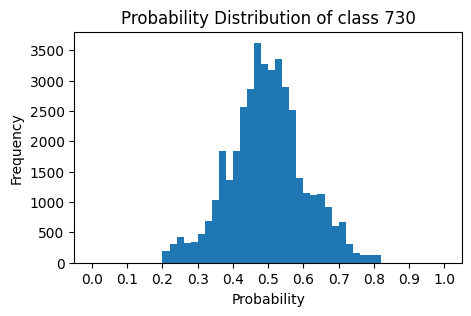

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier35.yaml
Train set: (163679, 36) (163679,)
Test set: (40921, 36) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.551236559139785
Accuracy train: 0.5840456014516218
Accuracy test:  0.5970772952762641
Accuracy all:   0.5866520039100684
Accuracy: 0.5840456014516218
Accuracy 730: 0.5943254438592847
Accuracy 731: 0.5737658846529814
Integrated:  163679  percentual:  1.0 %


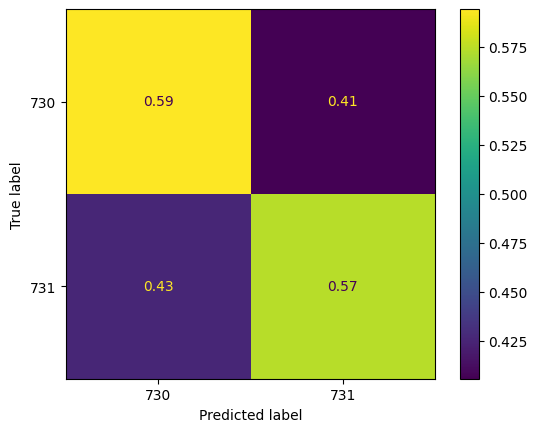

Accuracy: 0.5970772952762641
Accuracy 730: 0.5836958115439128
Accuracy 731: 0.6104594330400782
Integrated:  40921  percentual:  1.0 %


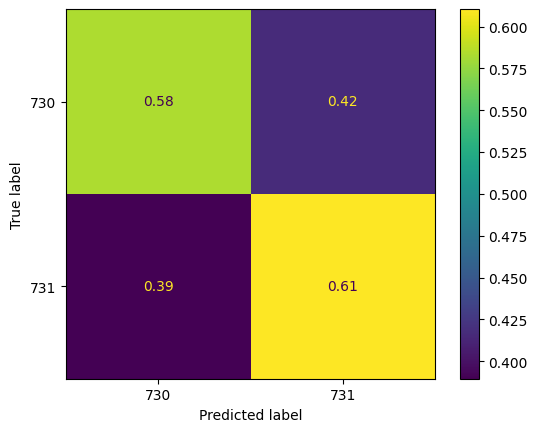

Accuracy: 0.5866520039100684
Accuracy 730: 0.592199413489736
Accuracy 731: 0.5811045943304007
Integrated:  204600  percentual:  1.0 %


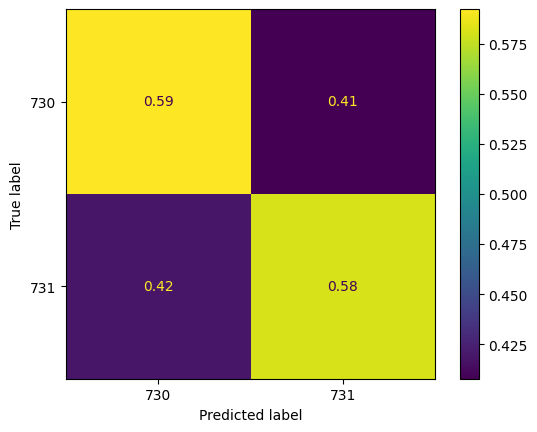

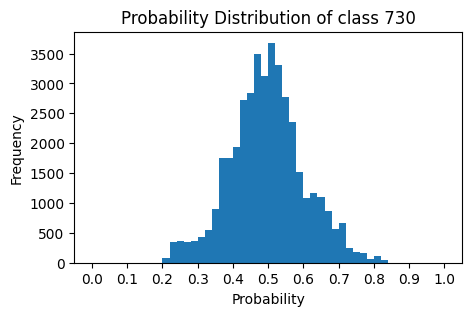

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier36.yaml
Train set: (163679, 37) (163679,)
Test set: (40921, 37) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5520185728250244
Accuracy train: 0.5881634174206831
Accuracy test:  0.5956843674397009
Accuracy all:   0.5896676441837733
Accuracy: 0.5881634174206831
Accuracy 730: 0.6008382311611823
Accuracy 731: 0.5754887585532746
Integrated:  163679  percentual:  1.0 %


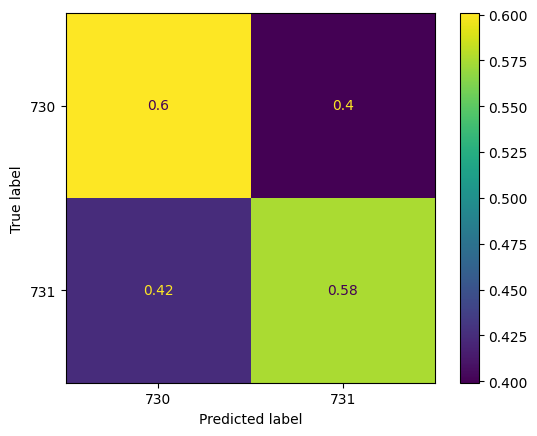

Accuracy: 0.5956843674397009
Accuracy 730: 0.5867748399393969
Accuracy 731: 0.604594330400782
Integrated:  40921  percentual:  1.0 %


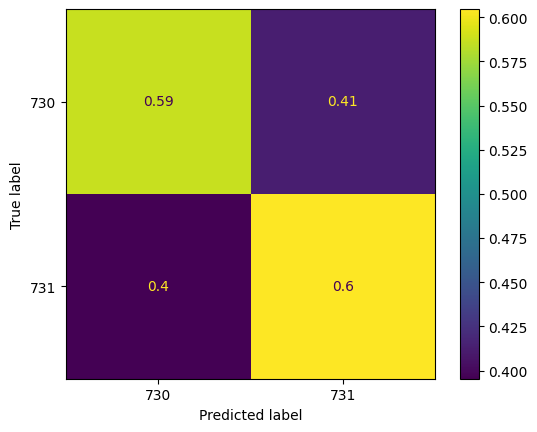

Accuracy: 0.5896676441837733
Accuracy 730: 0.5980254154447703
Accuracy 731: 0.5813098729227761
Integrated:  204600  percentual:  1.0 %


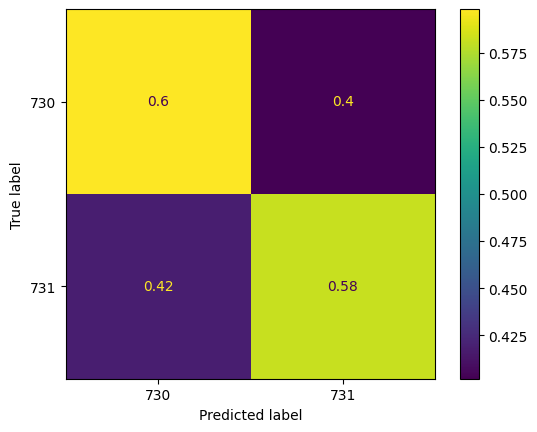

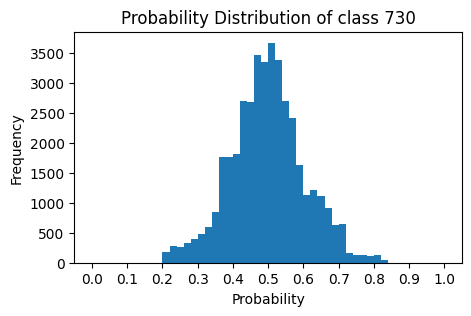

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier37.yaml
Train set: (163679, 38) (163679,)
Test set: (40921, 38) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5513734115347019
Accuracy train: 0.5871920038612162
Accuracy test:  0.6012560787859534
Accuracy all:   0.5900048875855327
Accuracy: 0.5871920038612162
Accuracy 730: 0.602756631923655
Accuracy 731: 0.5716275659824047
Integrated:  163679  percentual:  1.0 %


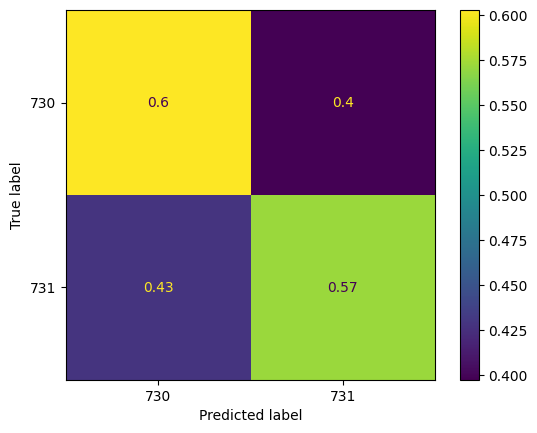

Accuracy: 0.6012560787859534
Accuracy 730: 0.5957675577928743
Accuracy 731: 0.6067448680351906
Integrated:  40921  percentual:  1.0 %


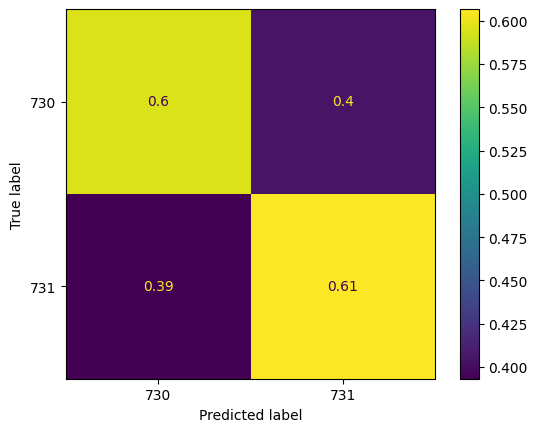

Accuracy: 0.5900048875855327
Accuracy 730: 0.6013587487781036
Accuracy 731: 0.5786510263929618
Integrated:  204600  percentual:  1.0 %


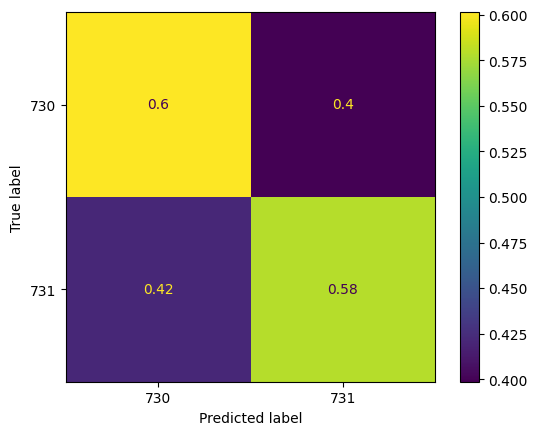

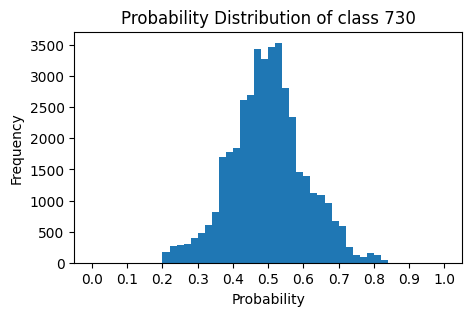

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier38.yaml
Train set: (163679, 39) (163679,)
Test set: (40921, 39) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 0.5}
Best score found:  0.5498875855327467
Accuracy train: 0.5887865883833601
Accuracy test:  0.6026978812834486
Accuracy all:   0.5915689149560117
Accuracy: 0.5887865883833601
Accuracy 730: 0.6067767201456519
Accuracy 731: 0.5707966764418377
Integrated:  163679  percentual:  1.0 %


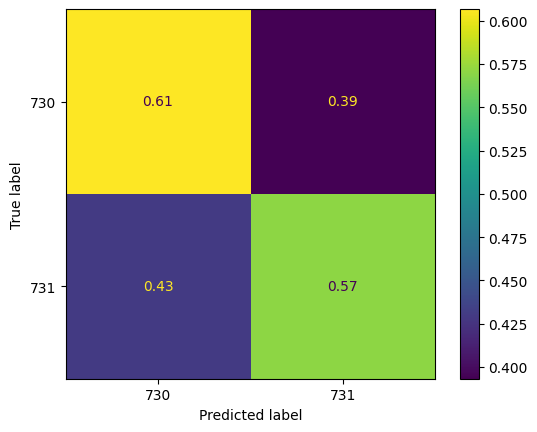

Accuracy: 0.6026978812834486
Accuracy 730: 0.6015835003176775
Accuracy 731: 0.6038123167155425
Integrated:  40921  percentual:  1.0 %


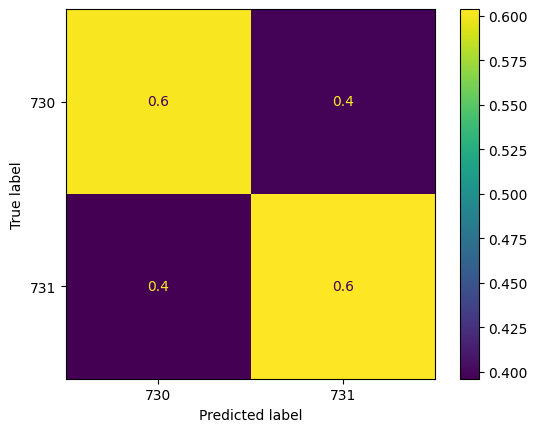

Accuracy: 0.5915689149560117
Accuracy 730: 0.6057380254154447
Accuracy 731: 0.5773998044965787
Integrated:  204600  percentual:  1.0 %


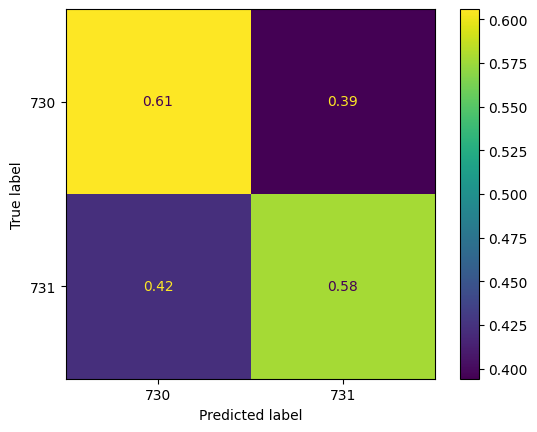

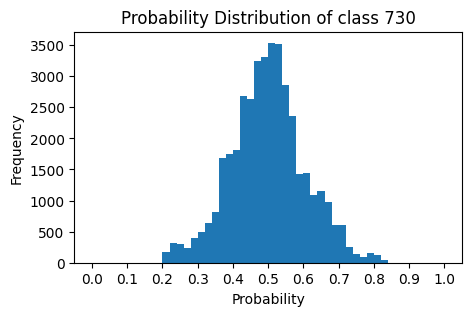

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier39.yaml
Train set: (163679, 40) (163679,)
Test set: (40921, 40) (40921,)
Best parameters found:  {'priors': None, 'reg_param': 1.0}
Best score found:  0.5491788856304984
Accuracy train: 0.5482988043670843
Accuracy test:  0.5854451259744385
Accuracy all:   0.5557282502443793
Accuracy: 0.5482988043670843
Accuracy 730: 0.5324845122740991
Accuracy 731: 0.5641129032258064
Integrated:  163679  percentual:  1.0 %


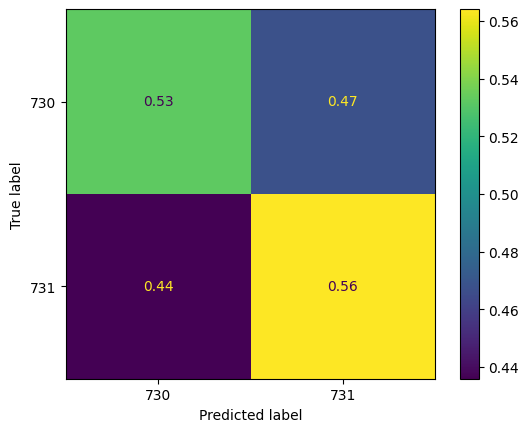

Accuracy: 0.5854451259744385
Accuracy 730: 0.5448902790674942
Accuracy 731: 0.6260019550342131
Integrated:  40921  percentual:  1.0 %


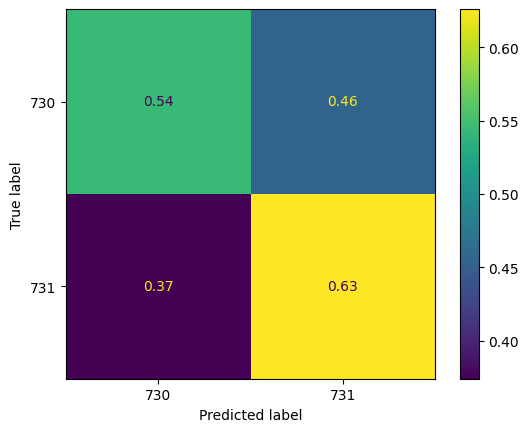

Accuracy: 0.5557282502443793
Accuracy 730: 0.5349657869012707
Accuracy 731: 0.5764907135874878
Integrated:  204600  percentual:  1.0 %


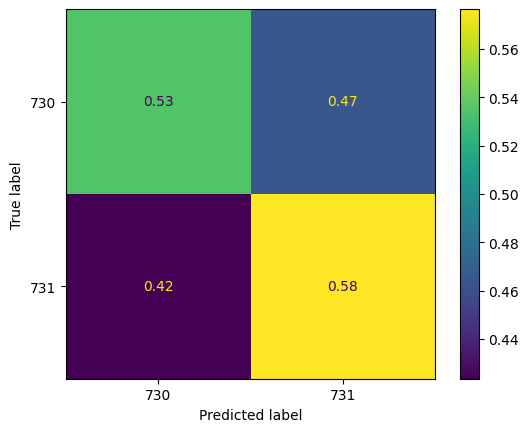

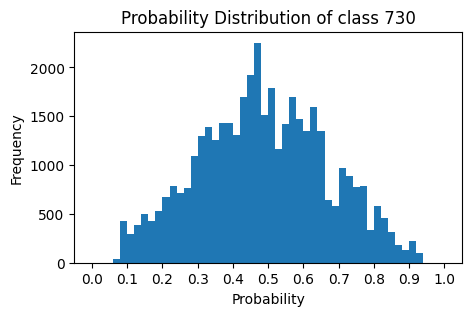

/home/paolo/cvsa_ws/record/i2/20250227/calibration/test/classifier/classifier40.yaml


In [3]:
subject = 'i2'
day = '20250227'
max_dataset = 40
for idx_dataset in range(1, max_dataset+1):
    path = '/home/paolo/cvsa_ws/record/' + subject + '/' + day + '/calibration/test/dataset/dataset' + str(idx_dataset) +'.mat'
    data = loadmat(path)

    X = fix_mat(data['X'])
    y = fix_mat(data['y']).ravel()
    info = fix_mat(data['info'])

    if 'logband' in path:
        type_ = 'logbandpower'
    else:
        type_ = 'psd'
        

    # start using last n-1 trials as test set
    n = 20
    start_test = info['startTrial'][-n] - 1

    X_train = X[:start_test,:]
    y_train = y[:start_test].ravel()
    X_test = X[start_test:,:]
    y_test = y[start_test:].ravel()

    print('Train set:', X_train.shape, y_train.shape)
    print('Test set:', X_test.shape, y_test.shape)
    
    param_grid = {'reg_param': [0.0, 0.1, 0.5, 1.0], 'priors': [None, [0.5, 0.5]]}

    #grid_search = GridSearchCV(estimator=QuadraticDiscriminantAnalysis(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=3).fit(X_train, y_train)
    grid_search = GridSearchCV(estimator=QuadraticDiscriminantAnalysis(), param_grid=param_grid, cv=5, n_jobs=-1).fit(X, y)

    #print("Results: ", grid_search.cv_results_)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)

    model_qda = QuadraticDiscriminantAnalysis(reg_param=grid_search.best_params_['reg_param'], store_covariance=True, priors=grid_search.best_params_['priors'])
    model_qda.fit(X_train, y_train)

    print(f'Accuracy train: {model_qda.score(X_train, y_train)}')
    print(f'Accuracy test:  {model_qda.score(X_test, y_test)}')
    print(f'Accuracy all:   {model_qda.score(X, y)}')


    ths_rej = [0.5, 0.5]
    bins_step = 0.02

    print_cm_rej(model_qda, X_train, y_train, ths_rej, 'train set',  ['730', '731'])
    print_cm_rej(model_qda, X_test,  y_test,  ths_rej, 'test set',  ['730', '731'])
    print_cm_rej(model_qda, X,  y,  ths_rej, 'all dataset',  ['730', '731'])

    histo_prediction(X_test, model_qda, bins_step, classes=['730', '731'])
    
    features_label = []
    if type(info['chSelected'].tolist()) == int:
        features_label.append(str(info['channelsLabel'][info['chSelected'].tolist() - 1][0]))
    else:
        for i in range(0, len(info['chSelected'].tolist())):
            features_label.append(str(info['channelsLabel'][info['chSelected'][i] - 1][0]))

    files = []
    for i in range(0, len(info['files'])):
        str_file = info['files'][i][0]
        files.append(str(str_file))
        
    band = info['bandSelected'].tolist()
    id_ch = info['chSelected'].tolist()

    model_params = {
        'QdaCfg': {
            'name': "qda",
            'params': {
                'subject': subject,
                'filename': 'qda',
                'filename_dataset': path,
                'files': files,
                'type_data': type_,
                'nclasses': int(len(model_qda.classes_)),
                'classlbs': model_qda.classes_.tolist(),
                'nfeatures': int(model_qda.n_features_in_),
                'chans': features_label,
                'idchans': id_ch, 
                'note': 'idchans are saved in matlab convention, instead the names are correct',
                'sampleRate': int(info['sampleRate']),
                'band': band,
                'filterOrder': int(info['filterOrder']),
                'priors': model_qda.priors_.tolist(),
                'means': model_qda.means_.tolist(),
                'covs': [arr.tolist() for arr in model_qda.covariance_],
                'rotations': [arr.tolist() for arr in model_qda.rotations_],
                'scalings': [arr.tolist() for arr in model_qda.scalings_]
            }
        }
    }

    # Save parameters to a YAML file
    c_dir = os.getcwd()
    c_prev = os.path.abspath(os.path.join(c_dir, os.pardir))
    path2save = c_prev[0:20] + 'record/' + subject + '/' + day + '/calibration/test/classifier/classifier' + str(idx_dataset) + '.yaml'

    yaml = YAML()
    with open(path2save, 'w') as file:
        yaml.dump(model_params, file)
        
    print(path2save)
